                                                             ESCUELA ONLINE DE NEGOCIO
En este proyecto consiste en desarrollar un modelo de Regresión Logística que nos permita optimizar la conversión de prospectos en estudiantes activos en la Escuela Online de Negocios (EON).



In [171]:
#Importar Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [9]:
# Importar datos

df = pd.read_csv('C:\\Users\\ALLAN\\Desktop\\Business Analytics con Python y ChatGPT\\EON.csv')

In [10]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Tenemos dos variables que podrían funcionar como 'ID': Prospect ID y Lead Number. Botemos la más compleja Prospect ID
df.drop(columns= 'Prospect ID', axis = 1, inplace = True)

In [12]:
df.set_index('Lead Number', inplace = True)

In [13]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
# Examinemos los datos para ver su tipo y si hay faltantes
# Notamos que hay 9240 registros, pero de las 35 variables, 17 tienen variables null

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

In [15]:
# Como parte de la preparación de los datos, iremos revisando una a una las variables para corregir su tipo de datos
# y hacer las respectivas imputaciones de datos faltantes

In [16]:
# Lead Source
# Se presenta un gráfico de barras para contar las fuentes del tráfico

<Axes: xlabel='count', ylabel='Lead Source'>

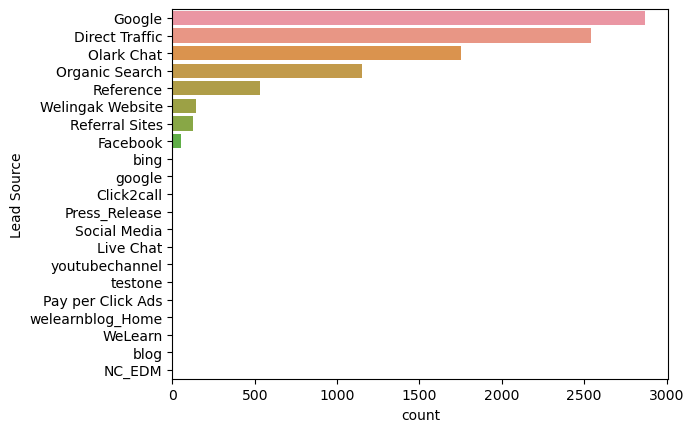

In [17]:
sns.countplot(y='Lead Source', data = df, order = df['Lead Source'].value_counts().index)

Si en el análisis exploratorio de datos se hubiera identificado una fuente de tráfico (Lead Source) que fuera claramente la más común,#la estrategia más directa habría sido reemplazar los valores faltantes con la fuente de tráfico más frecuente, es decir, la moda 
#Esto se basa en la suposición de que es más probable que un nuevo lead provenga de la fuente más común.Como no es el casos simplemen 
#asignaremos el valor "Desconocido" a los valores faltantes.

In [18]:
df['Lead Source'] =df['Lead Source'].fillna('Desconocido')

* Corrección de Tipo de Datos: Do Not Email, Do Not Call, Converted
* 
#Do Not Email: Una variable indicadora seleccionada por el cliente donde eligen si desean o no recibir correos electrónicos sobre el curso.* 

#Do Not Call: Una variable indicadora seleccionada por el cliente donde eligen si desean o no ser llamados sobre el curs* .

#Converted: La variable objetivo. Indica si un lead ha sido convertido exitosamente o no.

In [19]:
# Conversión de las variables a booleanos. Como se hará lo mismo con las tres, entonces haremos un lazo for

In [20]:
for v in ['Do Not Email', 'Do Not Call', 'Converted']:
    df[v] = df[v].replace('Yes', 1)
    df[v] = df[v].replace('No', 0)
    df[v] = df[v].astype(bool)

In [21]:
#Manejo de Valores Nulos: TotalVisits y Page Views Per Visit

#TotalVisits: El número total de visitas realizadas por el cliente en el sitio web.

#Page Views Per Visit: El número total de páginas vistas por el cliente durante sus visitas en el sitio web.

#Evaluamos la distribución de cada una de estas características para determinar el mejor método de imputación.

In [22]:
# Examinamos la distribución de Total Visits

df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TotalVisits', ylabel='Count'>

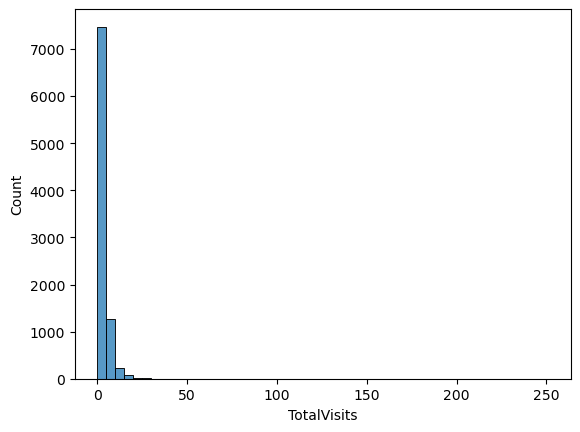

In [23]:
# Hacemos un histograma de la distribución

sns.histplot(x='TotalVisits', data=df, bins=50)

In [24]:
# Examinación de la distribución de 'Page Views Per Visit'

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

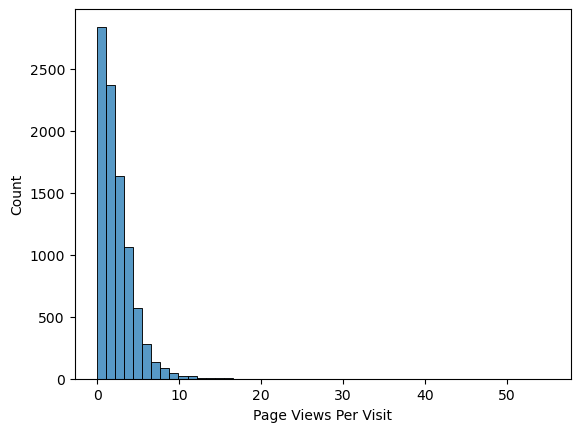

In [25]:
# Histograma de la distribución

sns.histplot(x='Page Views Per Visit', data=df, bins=50)

TEORIA: Cuando una distribución está severamente sesgada, el uso de la mediana para imputar valores faltantes es apropiado porque #la mediana es menos susceptible a la influencia de valores atípicos o extremos, proporcionando una mejor estimación central para datos sesgados 
#Si la distribución de estas características no estuviera sesgada y, en cambio, fuera normal (simétrica), podríamos considerar us 
#la media para la imputación de valores faltantes. La media es una medida buena y representativa de tendencia central para distribucios 
#que no están sesgadas, ya que en una distribución normal, la media y la mediana son prácticamente iguales.

In [26]:
# Imputamos la mediana para los valores faltantes de TotalVisits

df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [27]:
# Imputamos la mediana para los valores faltantes de 'Page Views Per Visit'

df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

PREPROCESAMIENTO DE VALORES NULOS

Manejo de Valores Nulos: Última Actividad

Last Activity: Última actividad realizada por el cliente. Incluye apertura de email, conversación en Olark Chat, etc.
Evaluar la distribución de la característica para determinar el mejor método de imputación de valores nulos.

In [29]:
 #Gráfico de Distribución de Last Activity

<Axes: xlabel='count', ylabel='Last Activity'>

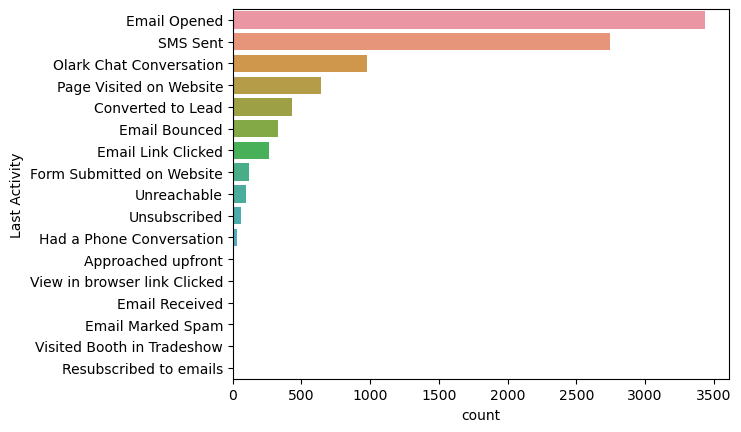

In [30]:
sns.countplot(y='Last Activity', data = df, order = df['Last Activity'].value_counts().index)

In [31]:
df['Last Activity'] = df['Last Activity'].fillna('Desconocido')

In [32]:
# Analizamos Country: el país del lead

In [33]:
# Gráfico de Distribución de Leads por País

<Axes: xlabel='count', ylabel='Country'>

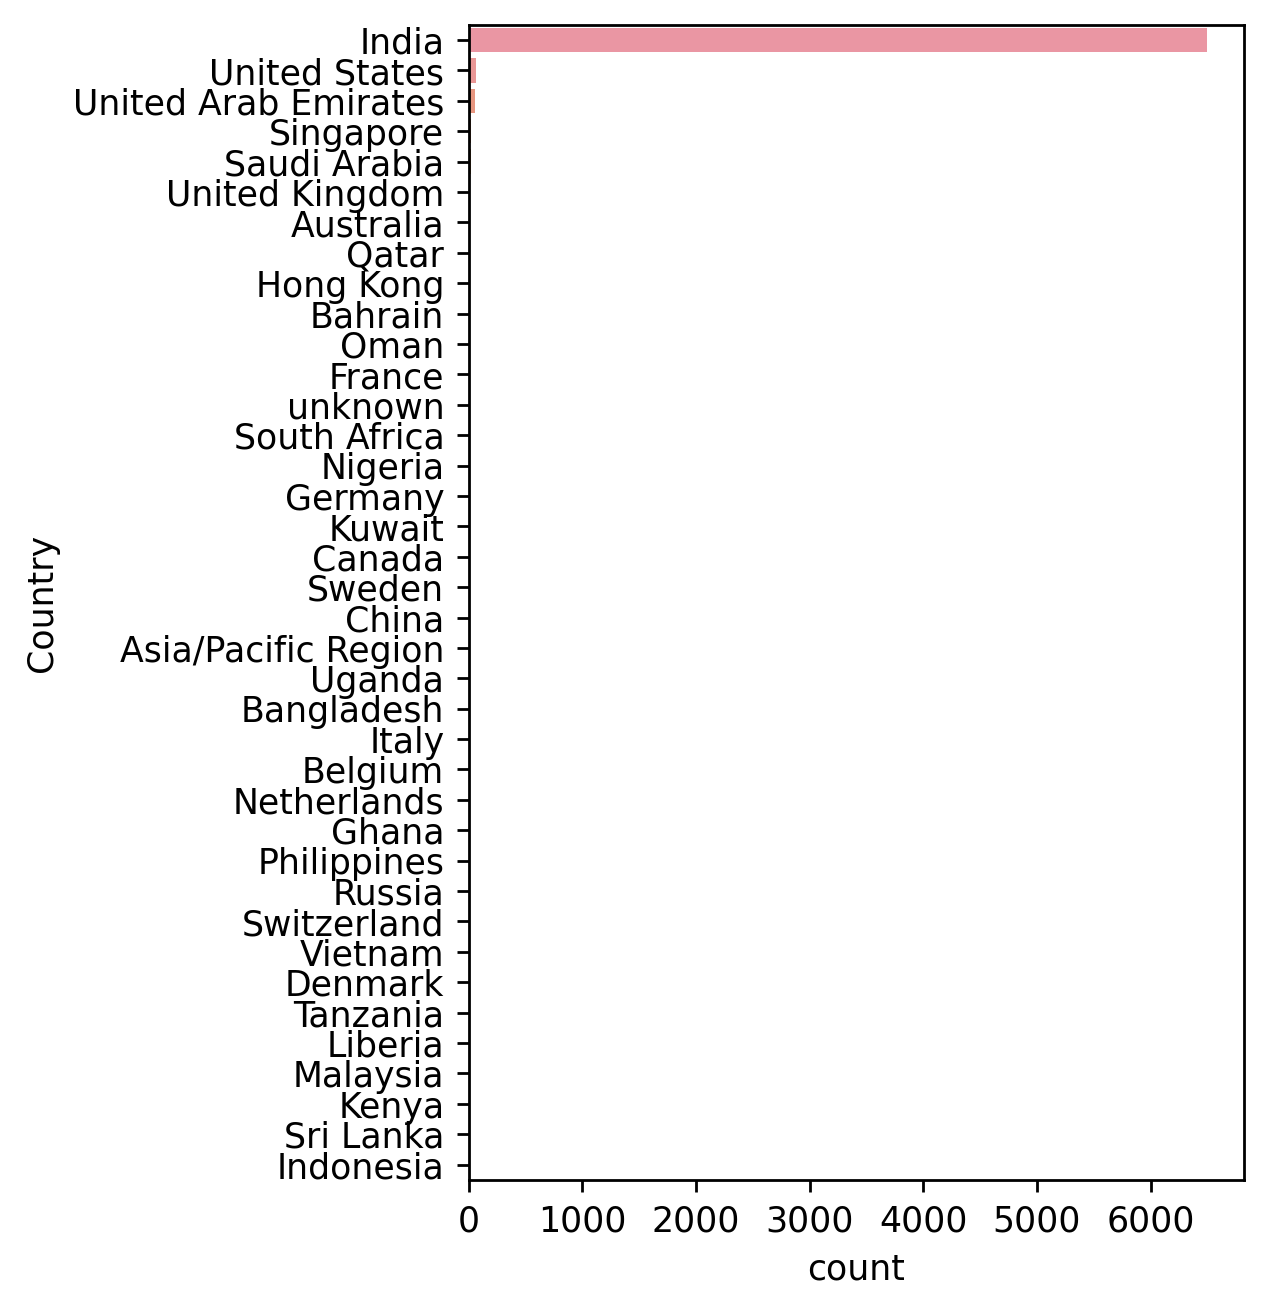

In [34]:
plt.figure(figsize = (4, 6), dpi = 250)
sns.countplot(y='Country', data = df, order = df['Country'].value_counts().index)

In [35]:
# country/Total Entries
6779/9240

0.7336580086580087

El número de datos faltantes es más de la cuarta parte. Y más de dos terceras partes son de la India.  En este caso en particular, nose  quisiers colocar simplemente 'Desconocido' cuandose  sabs que es muy probabl # que sean de la India y cuando tenemos otra variable (City) que nos puede ayudar a deducir el país de los faltantes

In [36]:
# Grafiquemos la distribución de 'City' cuando 'Country' es un dato faltante

<Axes: xlabel='count', ylabel='City'>

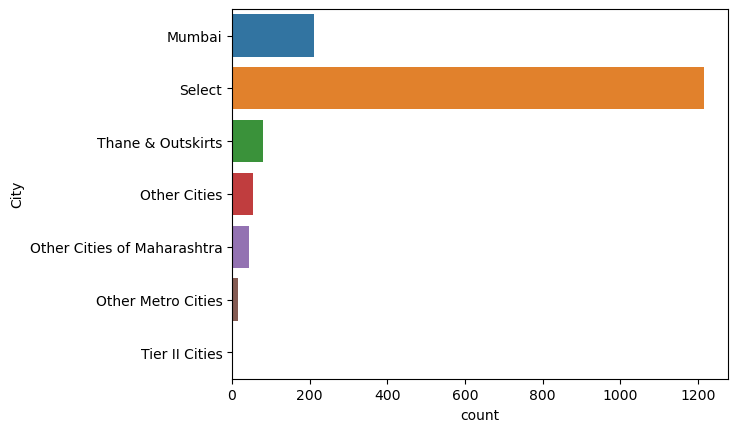

In [37]:
sns.countplot(y='City', data = df[df['Country'].isna()], order = df['City'].value_counts().index)

In [38]:
# El análisis de esta variable nos da insights muy relevantes para el tratamiento de los faltantes de 'Country'
# Podemos asignar 'India' para los faltantes que tengan como Ciudad: Mumbai, Other Cities of Mahrashtra y Thane & Outskirts
# Creamos un lazo for con un if anidado. Para los registros en la lista de las tres ciudades_india asignamos India, para el resto de faltantes
# asignamos desconocido

In [39]:
ciudades_india = ['Mumbai','Other Cities of Maharashtra','Thane & Outskirts']

In [40]:
for i in df[df['Country'].isnull()].index:
    if df.loc[i, 'City'] in ciudades_india:
        df.loc[i, 'Country'] = 'India'
    else:
        df.loc[i, 'Country'] = 'Desconocido'

In [41]:
# Las variables son similares, y no tienen valores faltantes
# Le daremos un tratamiento similar. se convertirá a valores booleanos con un lazo for

In [42]:
for c in ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
          'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses']:
    df[c] = df[c].replace('Yes', 1)
    df[c] = df[c].replace('No', 0)
    df[c] = df[c].astype(bool)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924

In [44]:
# Examinenos la distribución de las variables de formulario
# Vamos a hacer una lista de las 4 variables, y luego se hará un lazo for para graficarlas como subplots.

In [45]:
variables = ['Specialization', 'How did you hear about X Education',
             'What is your current occupation','What matters most to you in choosing a course']

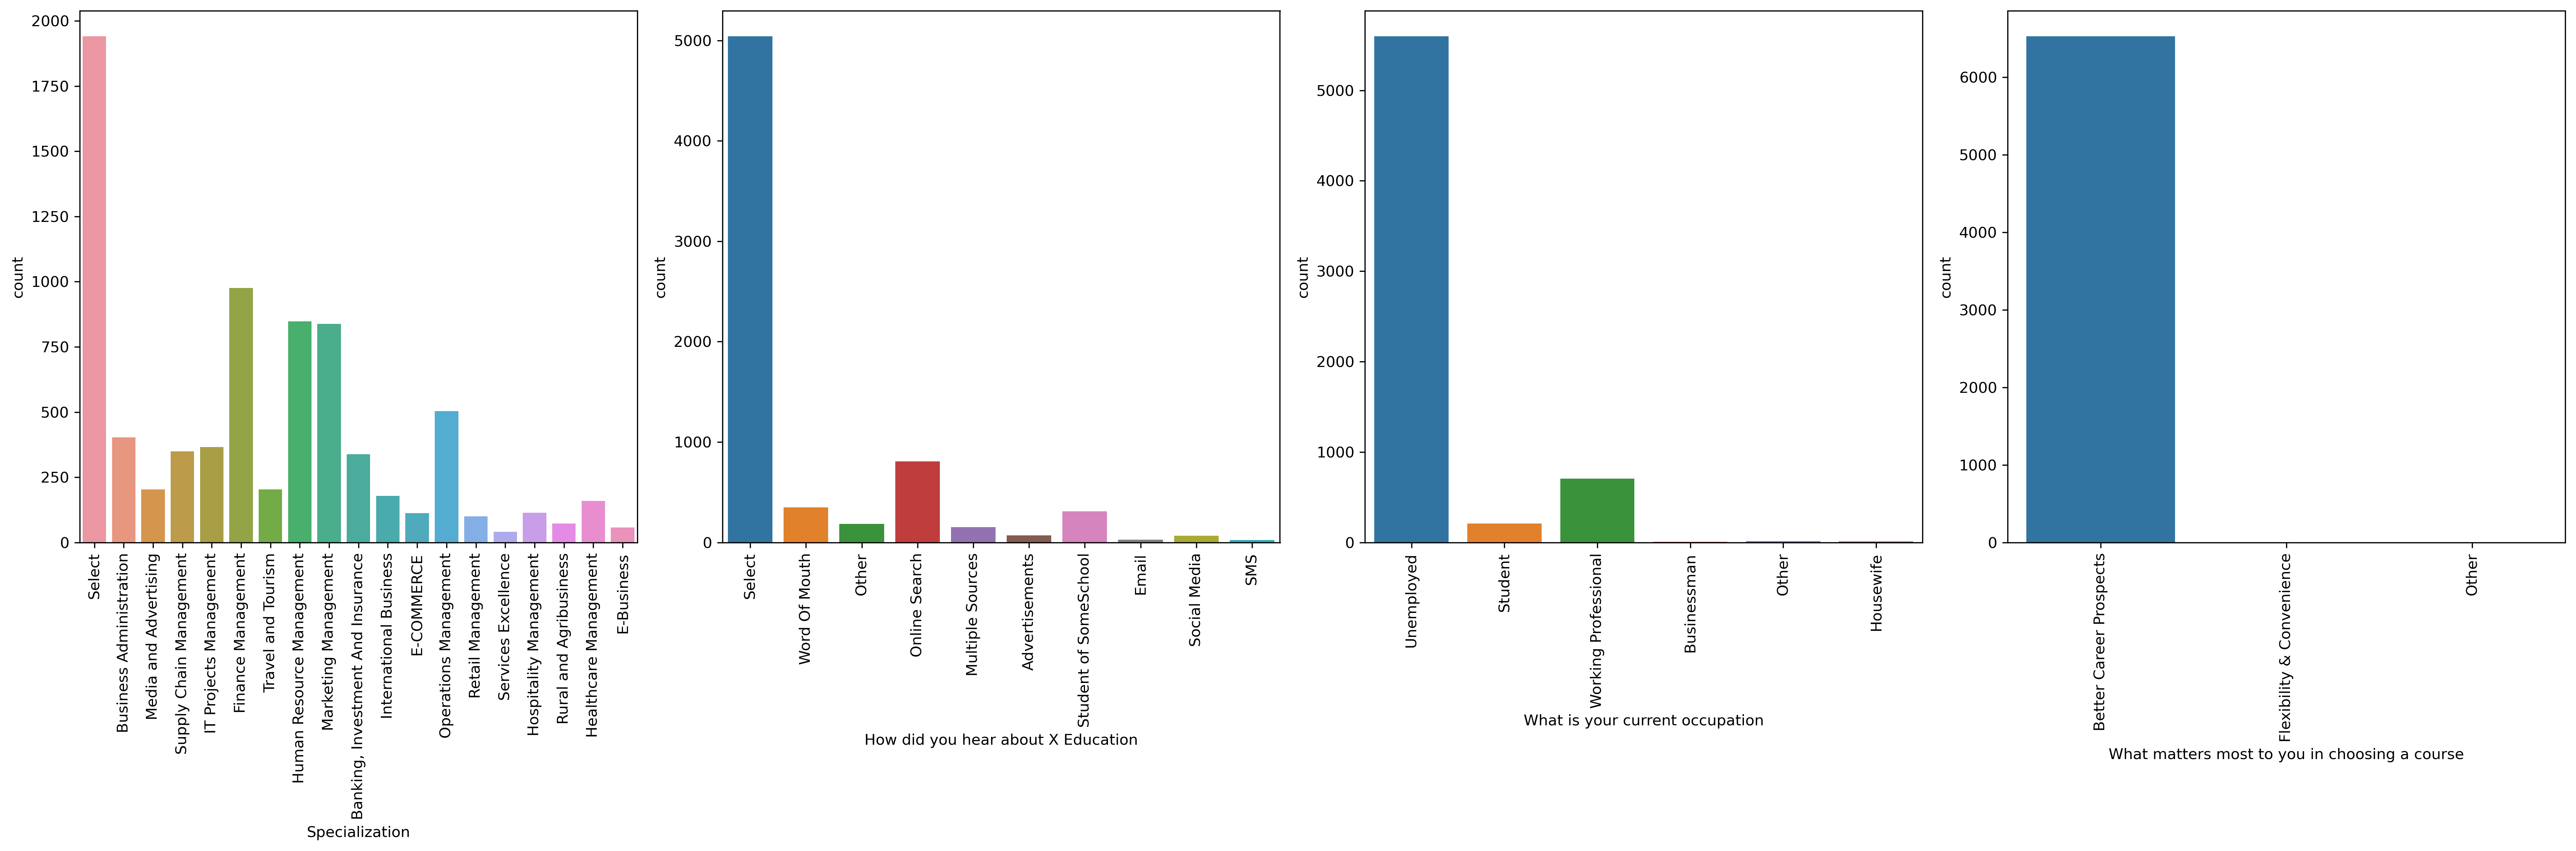

In [46]:
fig, ejes = plt.subplots(nrows=1, ncols=4, figsize=(24,8), dpi =300)
for i in range(4):
    sns.countplot(x=variables[i], data = df, ax=ejes[i])
    plt.sca(ejes[i])
    plt.xticks(rotation=90)
plt.tight_layout()

Los gráficos muestran la distribución de valores para una o más variables categóricas de un conjunto de datos, donde un gran número de observaciones tiene la etiqueta "Select". En el contexto del análisis de datos, la etiqueta "Select" a menudo se usa en los formularios de entrada de datos para indicar que el usuario no ha seleccionado ninguna de las opciones disponibles. En el análisis posterior, estos valores son efectivamente equivalentes a valores nulos o faltantes, ya que no proporcionan información útil sobre la categoría real.

Es importante destacar que, en el gráfico de 'What matters most to you in choosing a course', que se encuentra a la derecha, nos encontramos con un caso que permite una posible imputación de valores faltantes con la opción 'Better Career Prospects'. Esta categoría domina claramente sobre 'Flexibility & Convenience' y 'Others', indicando que la mayoría de los encuestados priorizan las perspectivas de carrera al elegir un curso. Si se considerara apropiado, se podría imputar la moda a los valores faltantes, asumiendo que es muy probable que los datos faltantes correspondan a la opción de mejores perspectivas de carrera debido al abrumador número de observaciones que la respaldan.

Sin embargo, por una cuestión de coherencia y para preservar la integridad de los datos, optaremos por asignar el valor 'Desconocido' a los datos faltantes. Cabe señalar que, de todas las variables en nuestro proceso de preprocesamiento, 'What matters most to you in choosing a course' sería el ejemplo más claro para justificar la imputación de valores faltantes utilizando la moda.

In [47]:
# Reemplazamos los valores 'Select' y faltantes con 'Desconocido'

In [48]:
for c in variables:
    df[c].replace('Select', 'Desconocido', inplace = True)
    df[c].fillna('Desconocido', inplace = True)

Corrección de Tipo de Datos: Update me on Supply Chain Content, Get updates on DM Content

Update me on Supply Chain Content: Indica si el cliente desea recibir actualizaciones sobre el contenido de la cadena de suministro.

Get updates on DM Content: Indica si el cliente desea recibir actualizaciones sobre el contenido de DM.

Estas características serán más fáciles de manipular, interpretar y utilizar en un modelo al convertirlas en valores booleanos.

In [49]:
for c in ['Update me on Supply Chain Content', 'Get updates on DM Content']:
    df[c] = df[c].replace('Yes', 1)
    df[c] = df[c].replace('No', 0)
    df[c] = df[c].astype(bool)

Eliminar variable: Tags

Tags: Etiquetas asignadas a los clientes que indican el estado actual del potencial cliente.

Dado que Tags está determinado por el progreso de un potencial cliente a través del embudo de marketing, es probable que sea endógeno al estado de conversión del potencial cliente. Como resultado, esta característica debería eliminarse.

In [50]:
df.drop(columns='Tags', axis = 1, inplace = True)

In [51]:
df.drop(columns='Lead Quality', axis = 1, inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924



# Manejo de Nulos: Lead Profile

Lead Profile: Un nivel de lead asignado a cada cliente basado en su perfil.

Evalúe la distribución de esta característica para determinar el mejor método de imputación de nulos.

In [53]:
# Gráfico de Distribución de Lead Profile

<Axes: xlabel='count', ylabel='Lead Profile'>

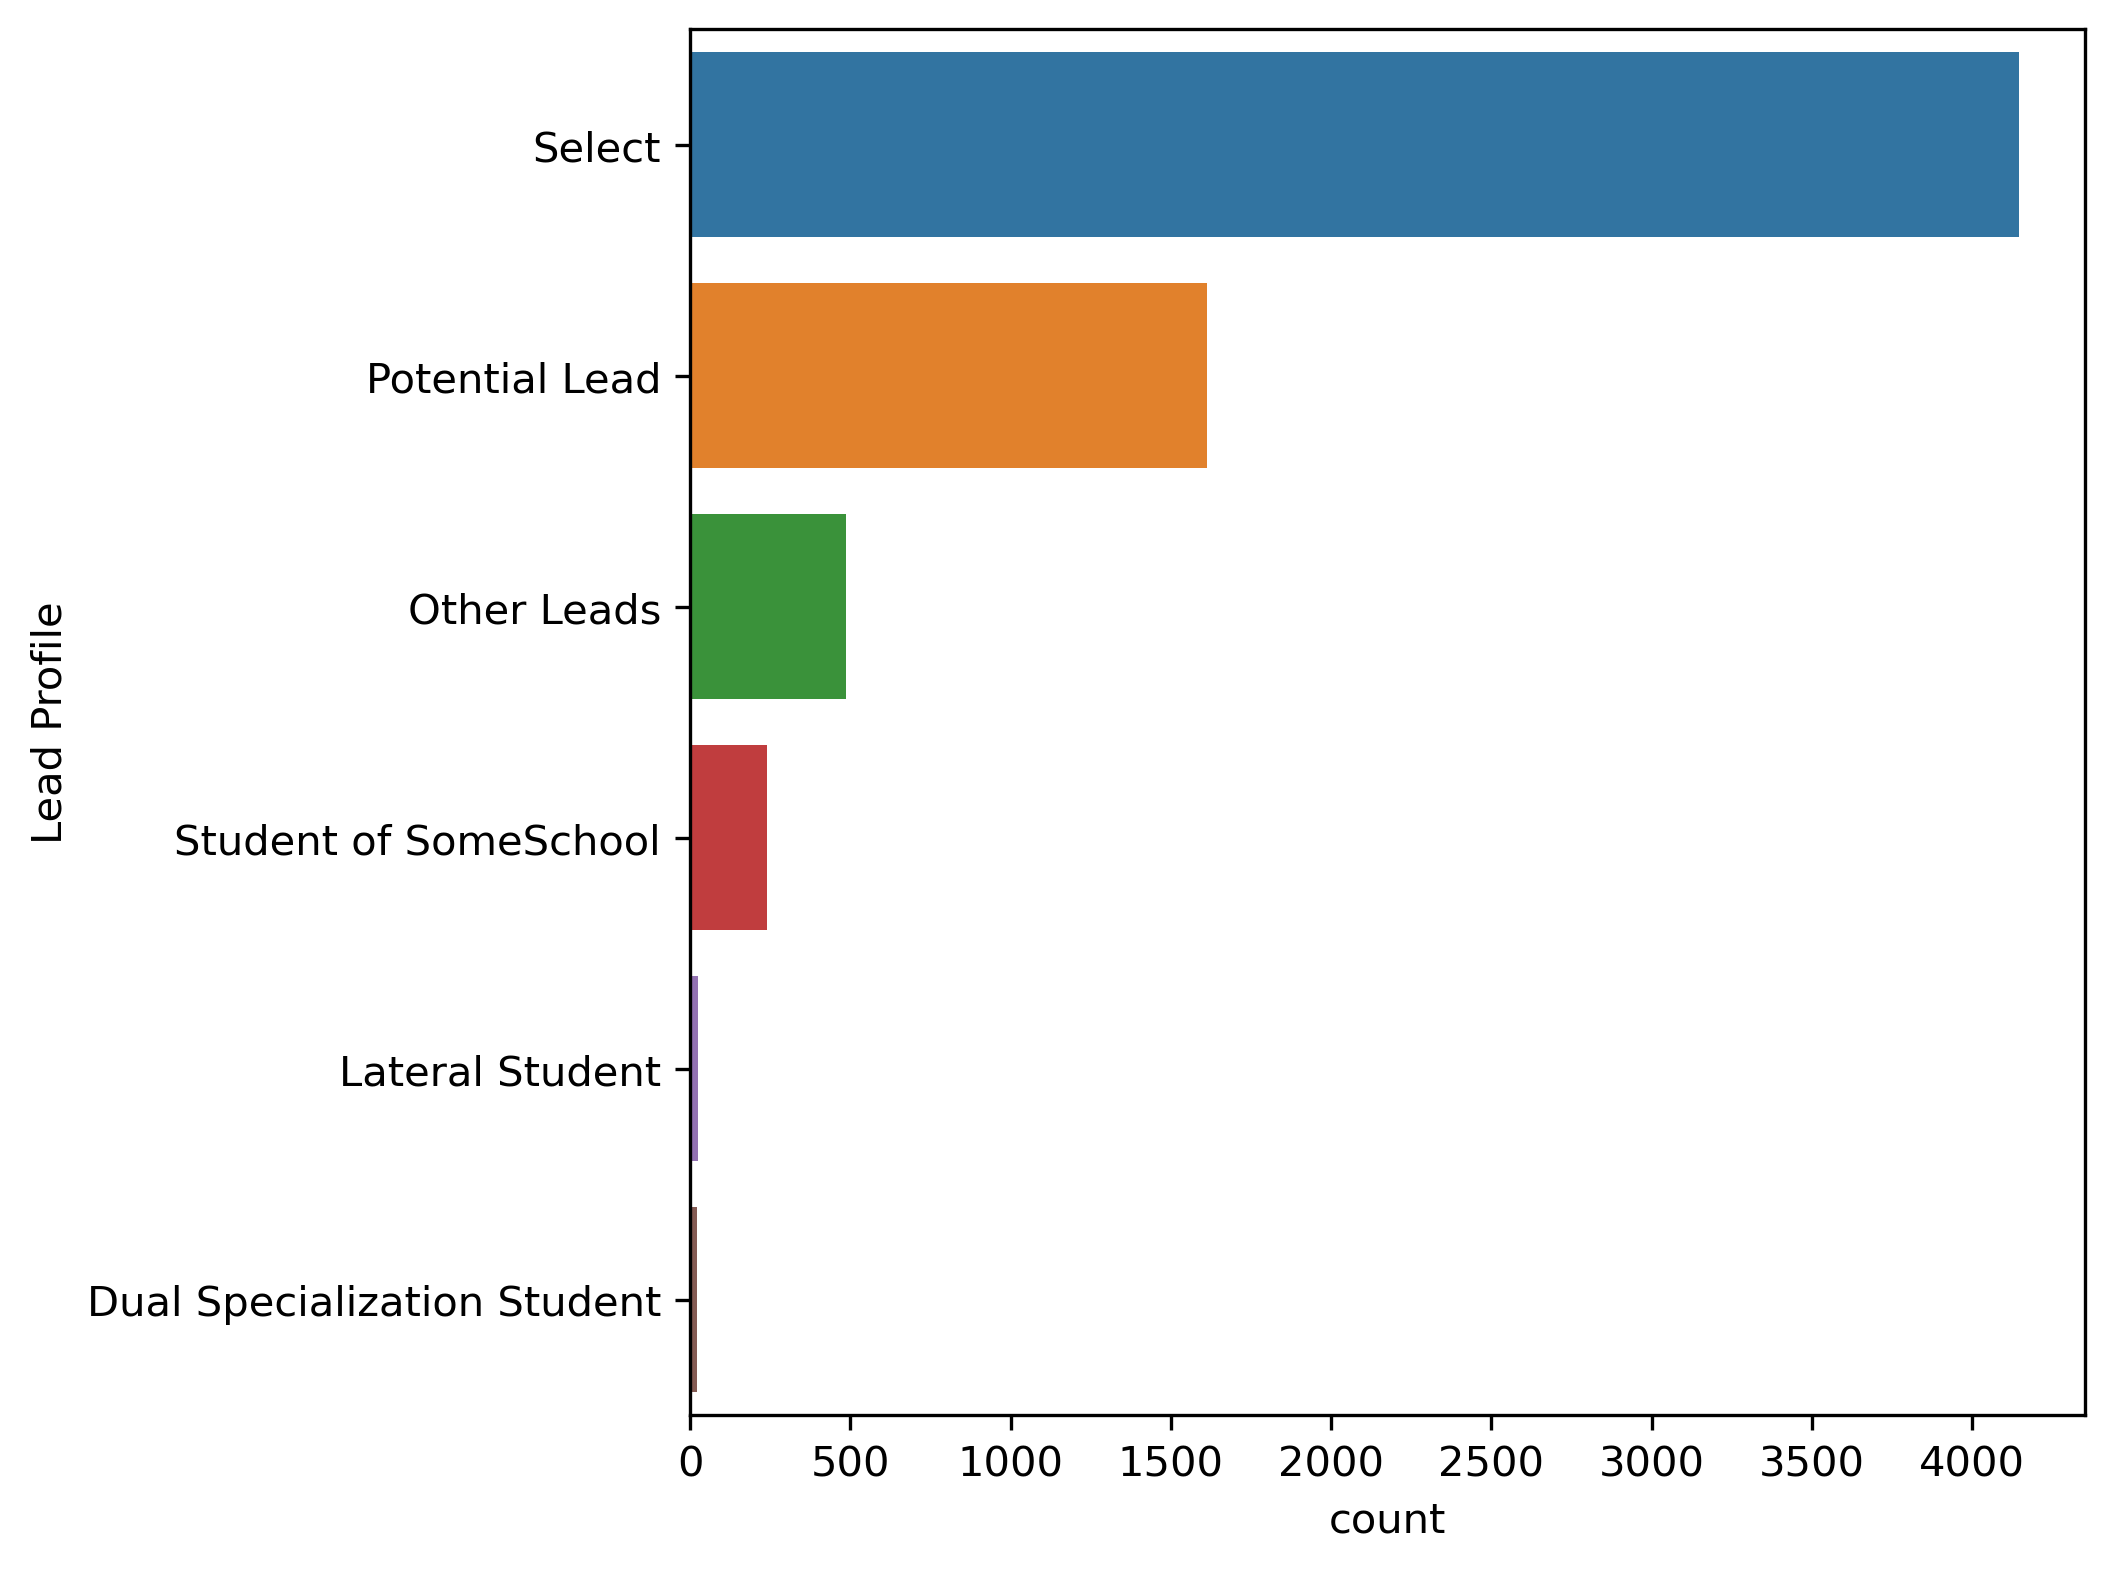

In [54]:
plt.figure(figsize=(6,6), dpi=300)
sns.countplot(y='Lead Profile', data = df, order = df['Lead Profile'].value_counts().index)

Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [55]:
# Reemplazamos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido

In [56]:
df['Lead Profile'].replace('Select', 'Desconocido', inplace = True)


In [57]:
df['Lead Profile'].fillna('Desconocido', inplace=True)

# Manejo de nulos: City

City: La ciudad del cliente potencial

Evalúe la distribución de esta característica para determinar el mejor método de imputación de nulos.

<Axes: xlabel='count', ylabel='City'>

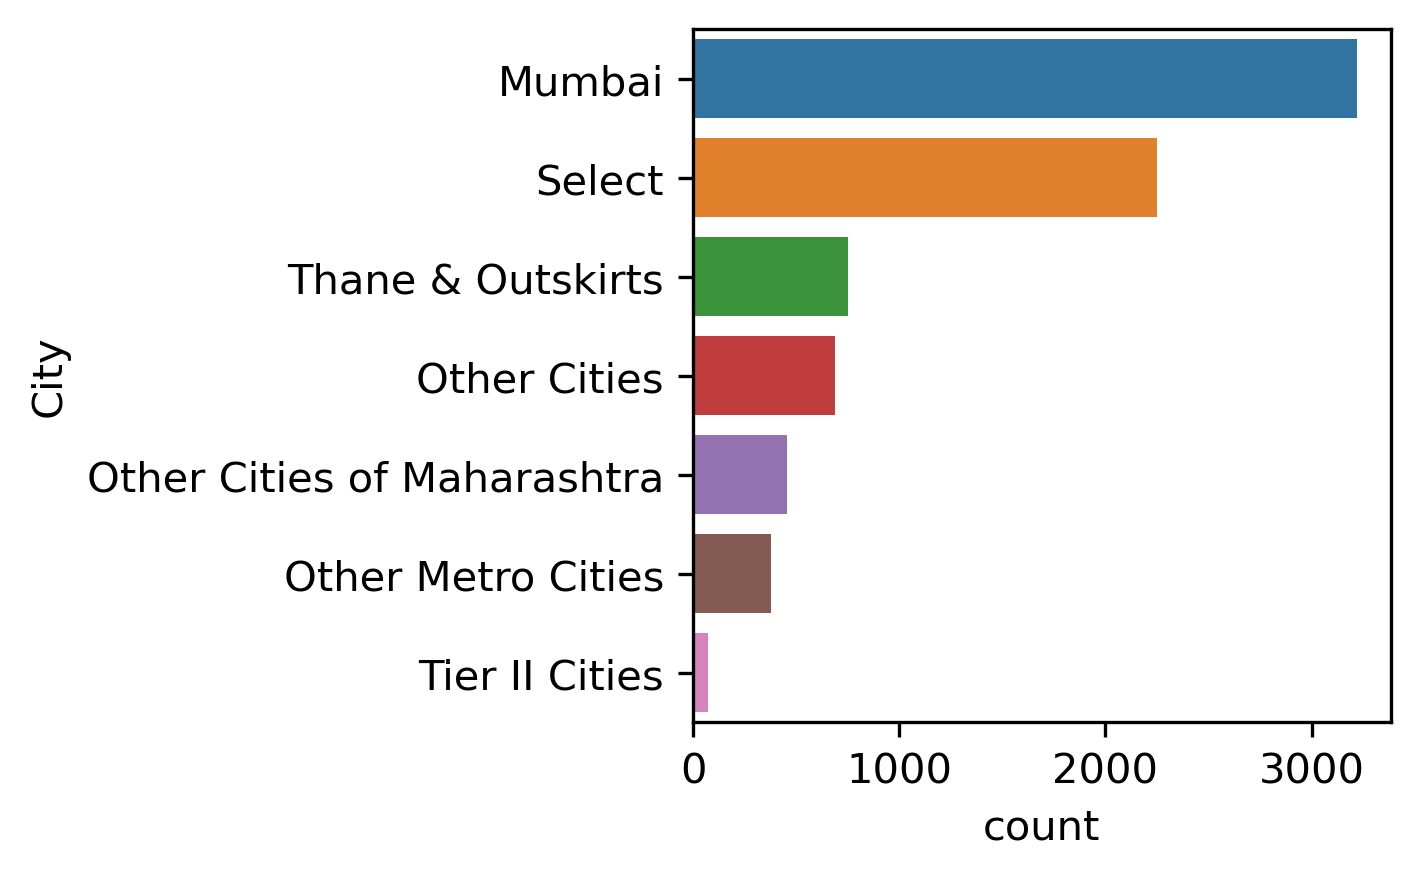

In [58]:
plt.figure(figsize = (3, 3), dpi = 300)
sns.countplot(y='City', data = df, order = df['City'].value_counts().index)

Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [59]:
# Reemplacemos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido

In [60]:
df['City'].replace('Select','Desconocido', inplace=True)

In [61]:
df['City'].fillna('Desconocido', inplace=True)

Corrección de Tipo de Datos: I agree to pay the amount through cheque, A free copy of Mastering The Interview

I agree to pay the amount through cheque: Indica si el cliente ha acordado pagar el monto mediante cheque o no.

A free copy of Mastering The Interview: Indica si el cliente desea una copia gratuita de 'Mastering the Interview' o no.

Estas características serán más fáciles de manipular, interpretar y utilizar en un modelo al convertirlas en valores booleanos.

In [62]:
# Convertimos las variables Yes/No a booleanos

In [63]:
for c in ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    df[c]=df[c].replace('Yes', 1)
    df[c]=df[c].replace('No', 0)
    df[c]=df[c].astype(bool)

Corrección del tipo de datos: Object to Category

In [64]:
# Convertimos los datos tipo string a categorias

In [65]:
for c in df.columns:
    if df[c].dtype=='object':
        df[c] = df[c].astype('category')
    

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

Índices y Puntuaciones Asimétricas

Asymmetrique Activity Index: Un índice asignados a cada cliente basados en su actividad: alto, medio y bajo.

Asymmetrique Profile Index: Un índice asignados a cada cliente basados en su perfil: alto, medio y bajo.

Asymmetrique Activity Score: Una puntuación asignados a cada cliente basados en su actividad.

Asymmetrique Profile Score: Una puntuación asignados a cada cliente basados en su perfil.

Evalúe la distribución de cada característica para determinar el método de imputación de nulos más apropiado.

In [67]:
# Estadísticas descriptivas de los scores

In [68]:
estadisticas_scores = pd.DataFrame(
    {'Assymmetrique Activity Score': df['Asymmetrique Activity Score'].describe(),
    'Asymmetrique Profile Score': df['Asymmetrique Profile Score'].describe()})

In [69]:
estadisticas_scores

,Assymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


In [70]:
# Notemos que la mediana, está un poco a la izquiera (es decir es menor) que la media en ambos casos. Para confirmar,
# hágamos un histograma

In [71]:
# Grafiquemos la distribución de los scores

scores = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


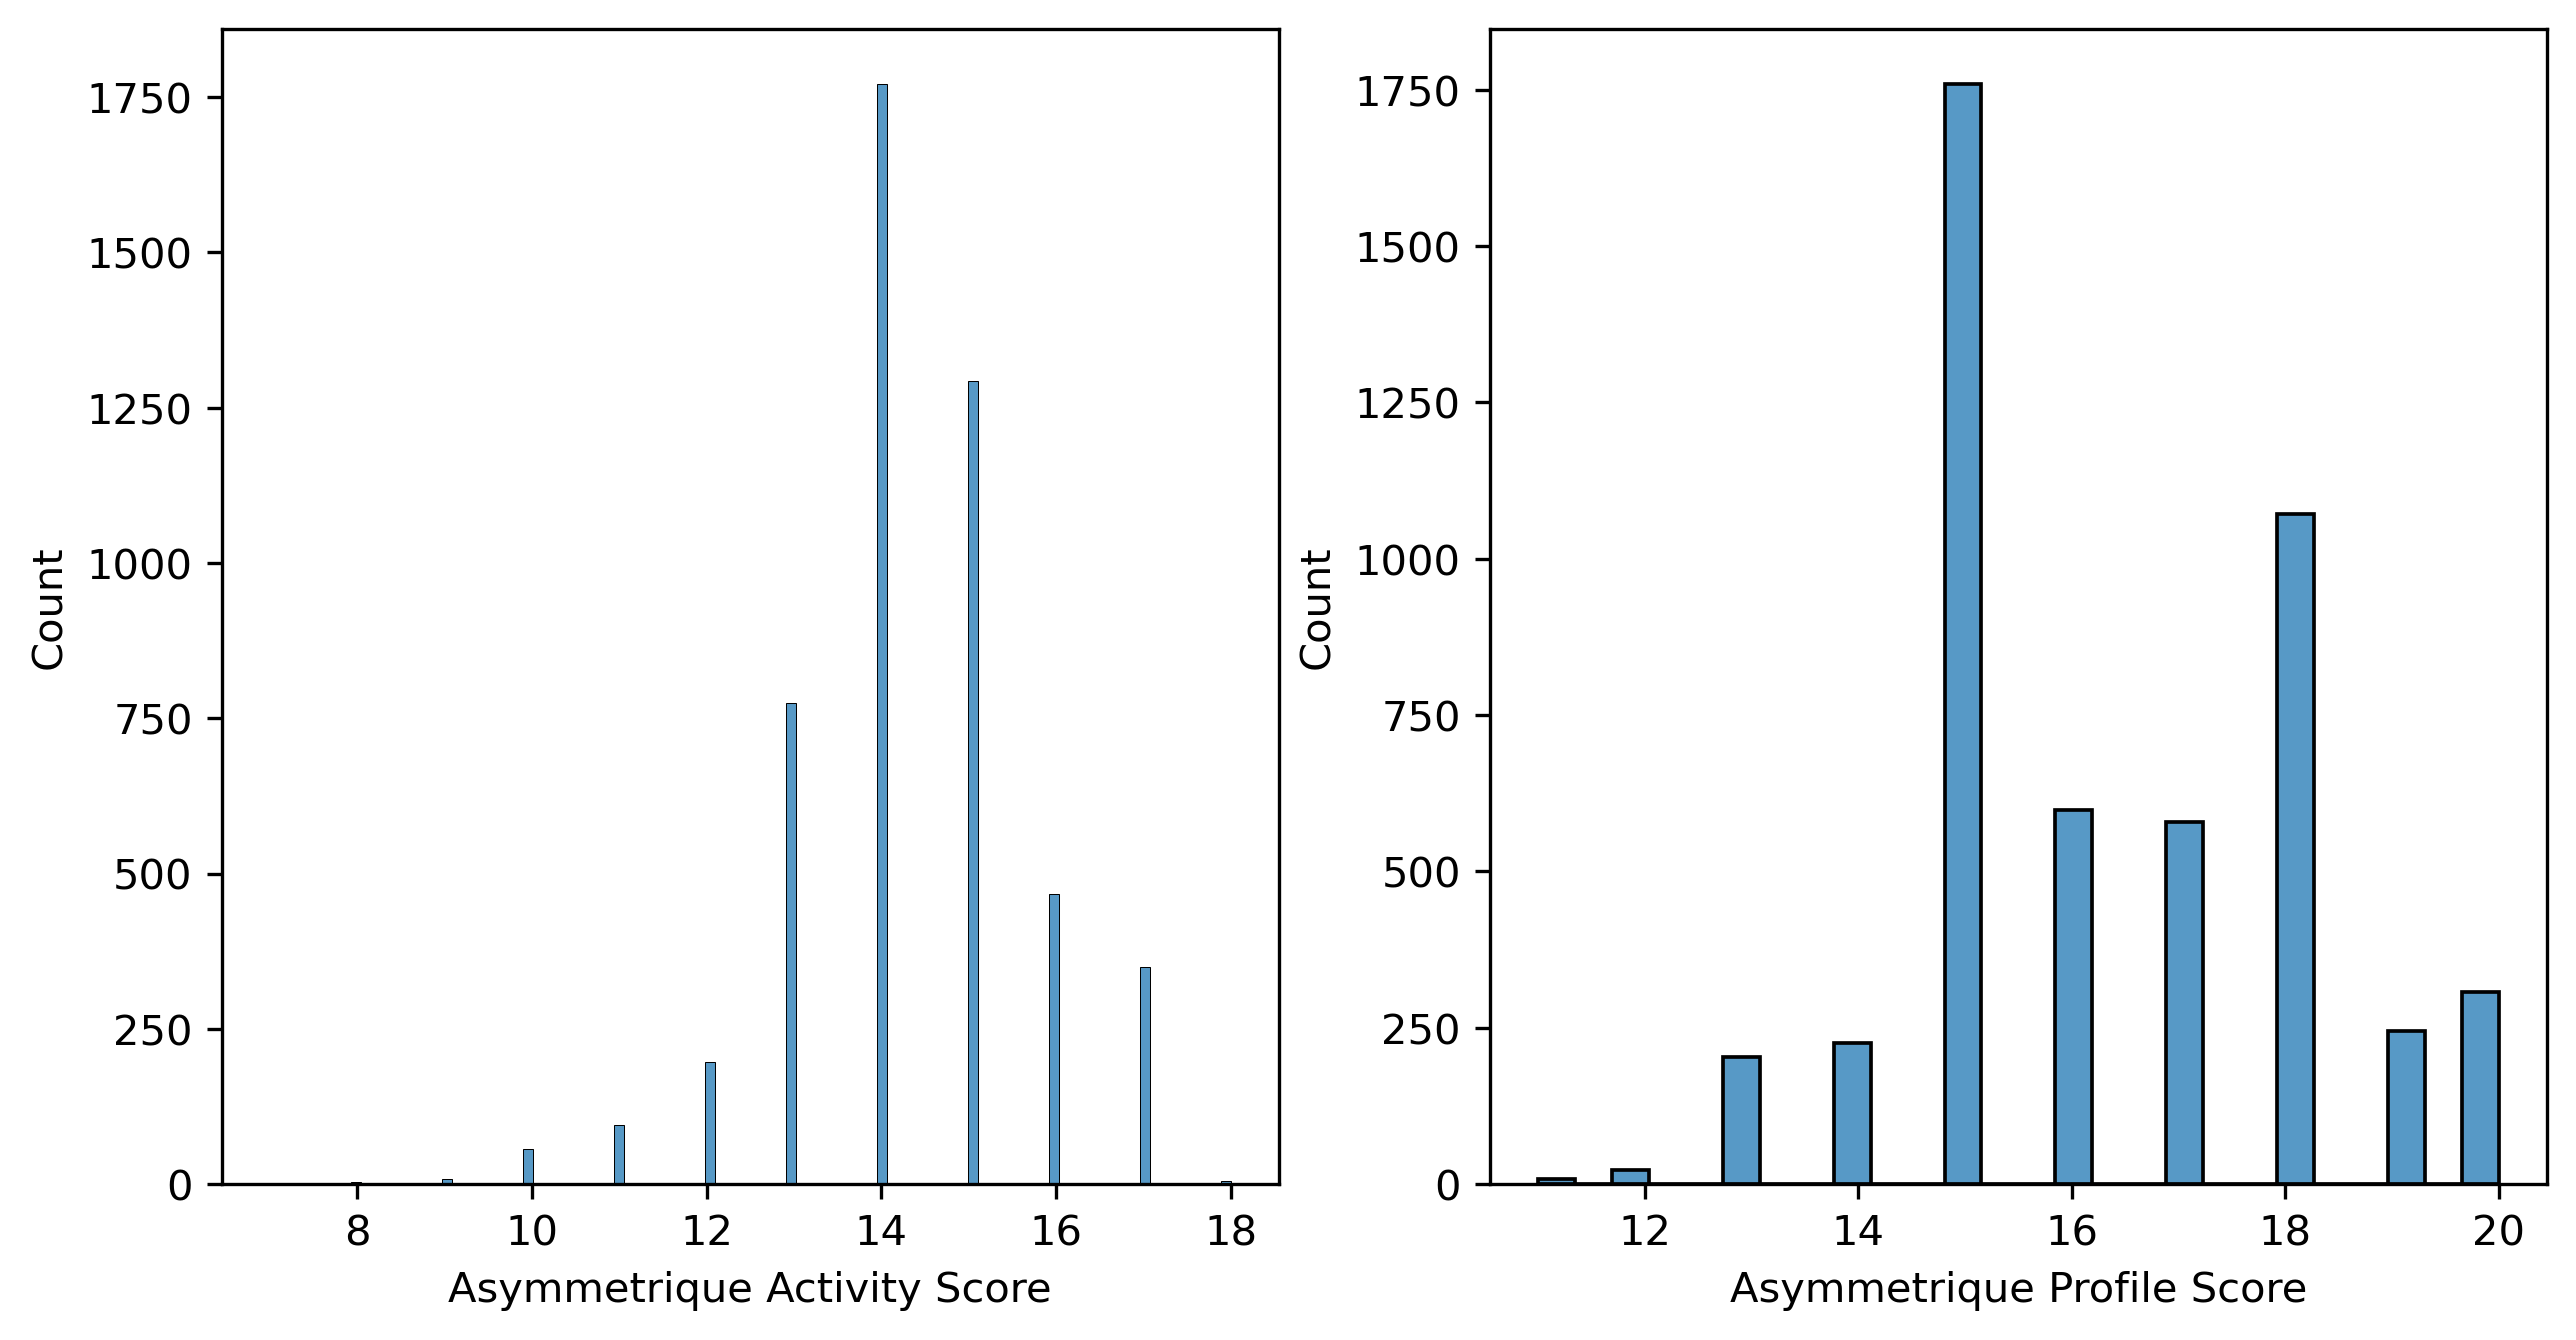

In [72]:
fig, ejes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi = 300)
for i in range(2):
    sns.histplot(x=scores[i], data = df, ax=ejes[i])

In [73]:
# Ambas están sesgadas, por lo tanto sería más apropiado rellenar los valores faltantes con la mediana en lugar de la media

In [74]:
for s in scores:
    df[s].fillna(df[s].median(), inplace = True)

In [75]:
# Ahora hagámos un histograma para los índices

In [76]:
indices = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


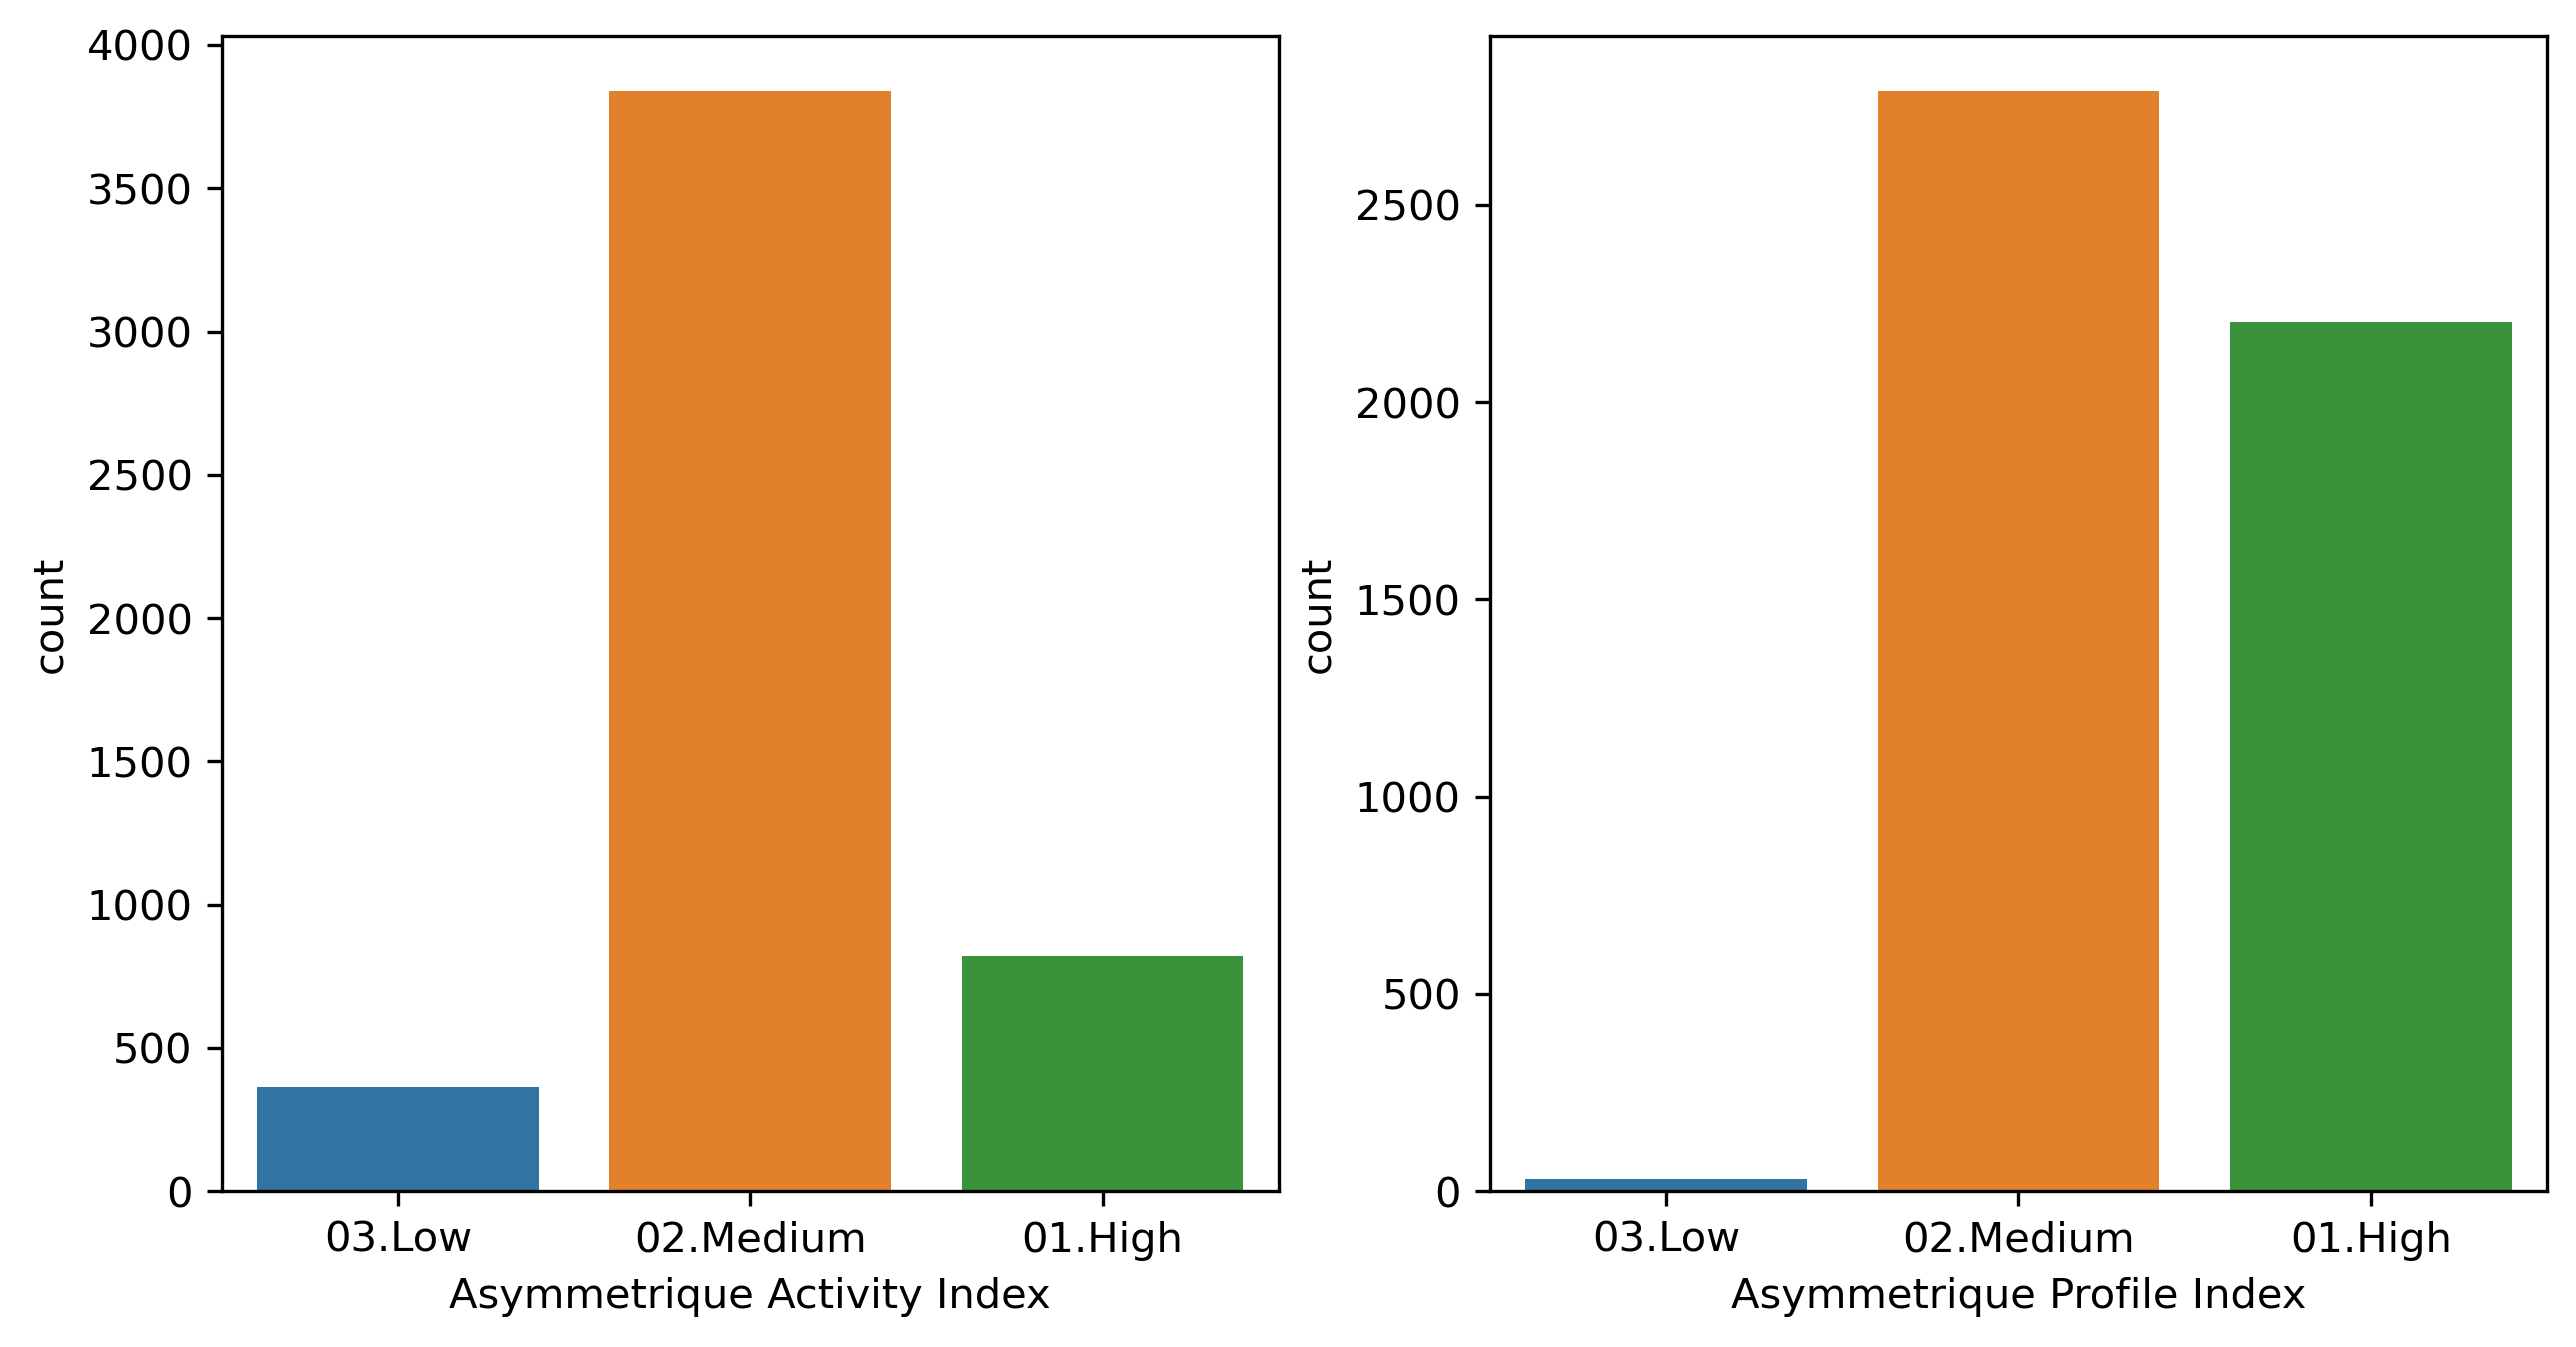

In [77]:
fig, ejes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi = 300)
for i in range(2):
    sns.countplot(x=indices[i], data = df, ax=ejes[i], order = ['03.Low','02.Medium','01.High'])

Parece que las características del índice pueden simplemente estar agrupadas de acuerdo con la Puntuación Asimétrica, en cuyo caso ambas características del índice son redundantes. Podemos confirmar esto observando la puntuación Asimétrica media por Índice Asimétrico.

In [78]:
# Agrupemos por el Índice de Actividad Asimétrico
# El método agg en Pandas se utiliza para aplicar una o varias funciones de agregación a una serie de datos. 
# En el contexto del código que escribiremos, agg se usa después de groupby para calcular la media ('mean') 
# de la columna 'Asymmetrique Activity Score' para cada grupo único en 'Asymmetrique Activity Index'.

In [79]:
agrupados_por_activity_index = df.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score':'mean'})

C:\Users\ALLAN\AppData\Local\Temp\ipykernel_54756\2842615741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados_por_activity_index = df.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score':'mean'})


In [80]:
agrupados_por_activity_index

,Asymmetrique Activity Score
Asymmetrique Activity Index,
01.High,16.437272
02.Medium,14.134931
03.Low,11.290055


In [81]:
# Agrupemos por el Índice de Perfil Asimétrico

agrupados_por_profile_index = df.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score':'mean'})

C:\Users\ALLAN\AppData\Local\Temp\ipykernel_54756\667888501.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados_por_profile_index = df.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score':'mean'})


In [82]:
agrupados_por_profile_index

,Asymmetrique Profile Score
Asymmetrique Profile Index,
01.High,18.128007
02.Medium,14.987446
03.Low,11.709677


Como se puede observar de los cálculos anteriores, los valores de Asymmetrique Activity/Profile Index parecen simplemente agrupar los Asymmetrique Activity/Profile Scores. Como resultado, las características del índice son redundantes y pueden ser eliminadas.

In [83]:
# Elimemos las columnas de índice

In [84]:
df.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index'], axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

# Análisis Exploratorio de las Variables Categóricas

In [86]:
# Creamos la función conteo_de_convertidos: Hará un gráfico de barras (countplot) comparando los convertidos y no convertidos
# para la variable independiente respectiva. Será de mucha utilidad para las variables categóricas.

In [87]:
def conteo_de_convertidos(independiente, dependiente = 'Converted'):
    plt.figure(figsize=(6,6), dpi = 300)
    sns.countplot(y=independiente, data = df, hue= dependiente, order = df[independiente].value_counts().index)
    plt.title("Distribución de la variable categórica " + independiente + " por Convertidos")
    plt.show

In [88]:
# Ahora calculamos la razón de conversión de leads en todo el conjunto de datos
# Como es booleana (son unos), sólo debemos sacar el promedio

In [89]:
tasa_de_conversion = round(df['Converted'].mean(), 2)

In [90]:
tasa_de_conversion


0.39

In [91]:
# Análisis Exploratorio de una Variable: Lead Source

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

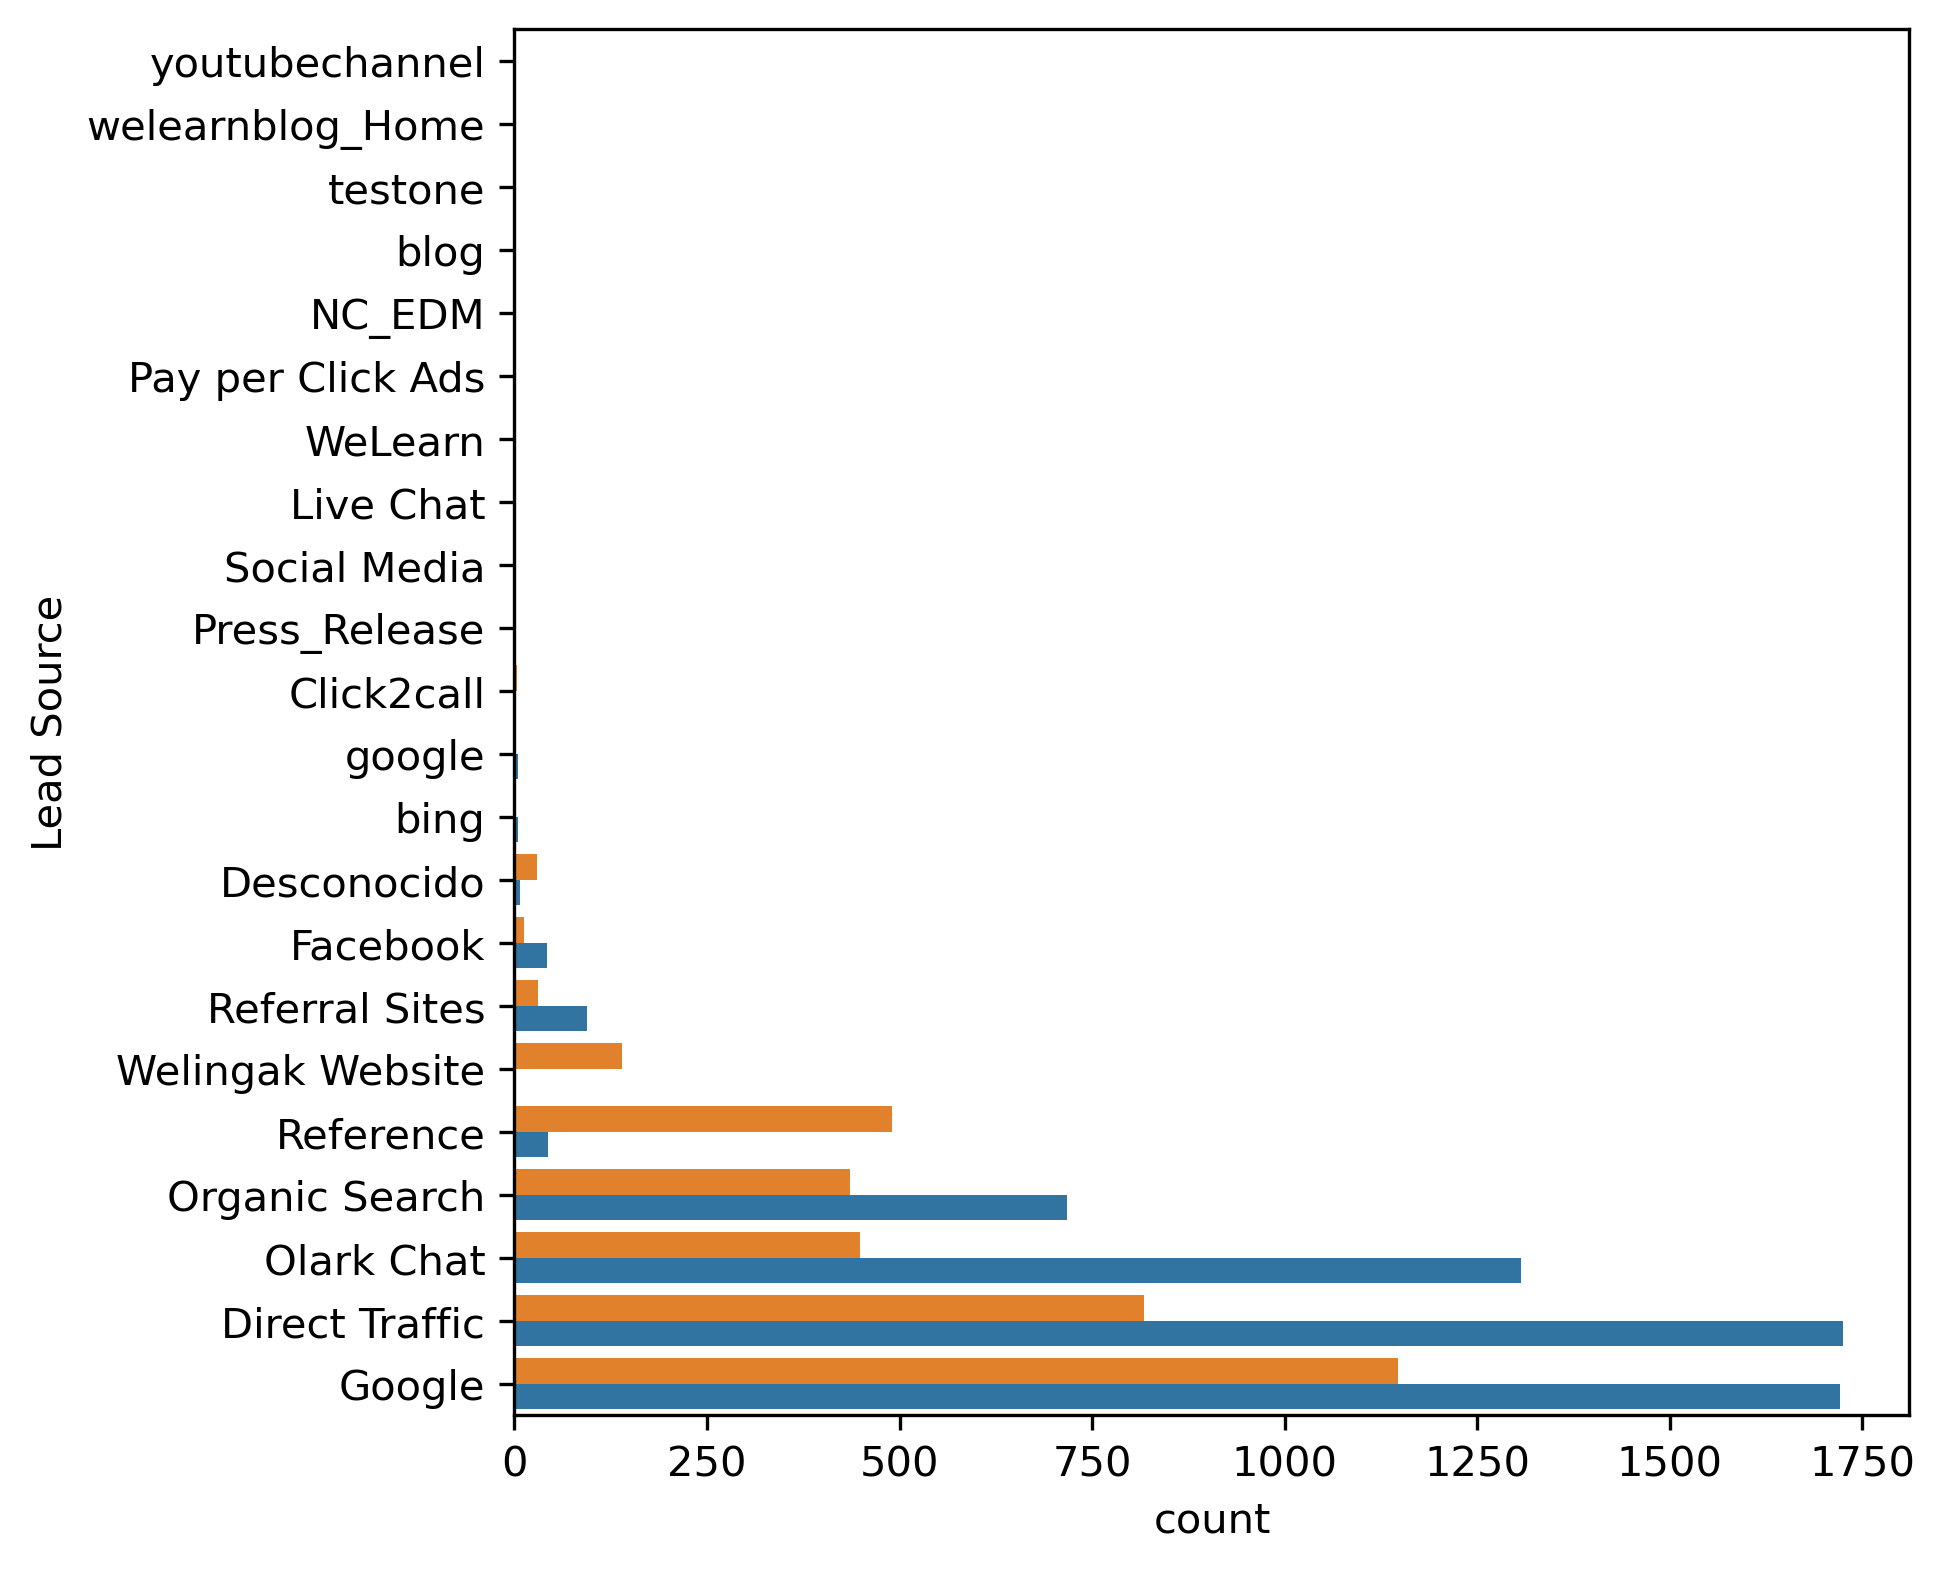

In [92]:
conteo_de_convertidos('Lead Source')

Observaciones

La tasa de conversión parece ser más alta para los leads que provienen del sitio web de Wellingak o que son referidos.

Es posible que aumentar el número de leads referidos y que provienen del sitio web de Wellingak aumente la tasa de conversión general.

Aunque Google y el Tráfico Directo son la fuente de un número similar de leads, la tasa de conversión parece ser más alta entre los leads que provienen de Google.

Hay menos leads con Búsqueda Orgánica como fuente que de Google, pero los leads que provienen de ambas fuentes parecen tener una tasa de conversión similar.

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

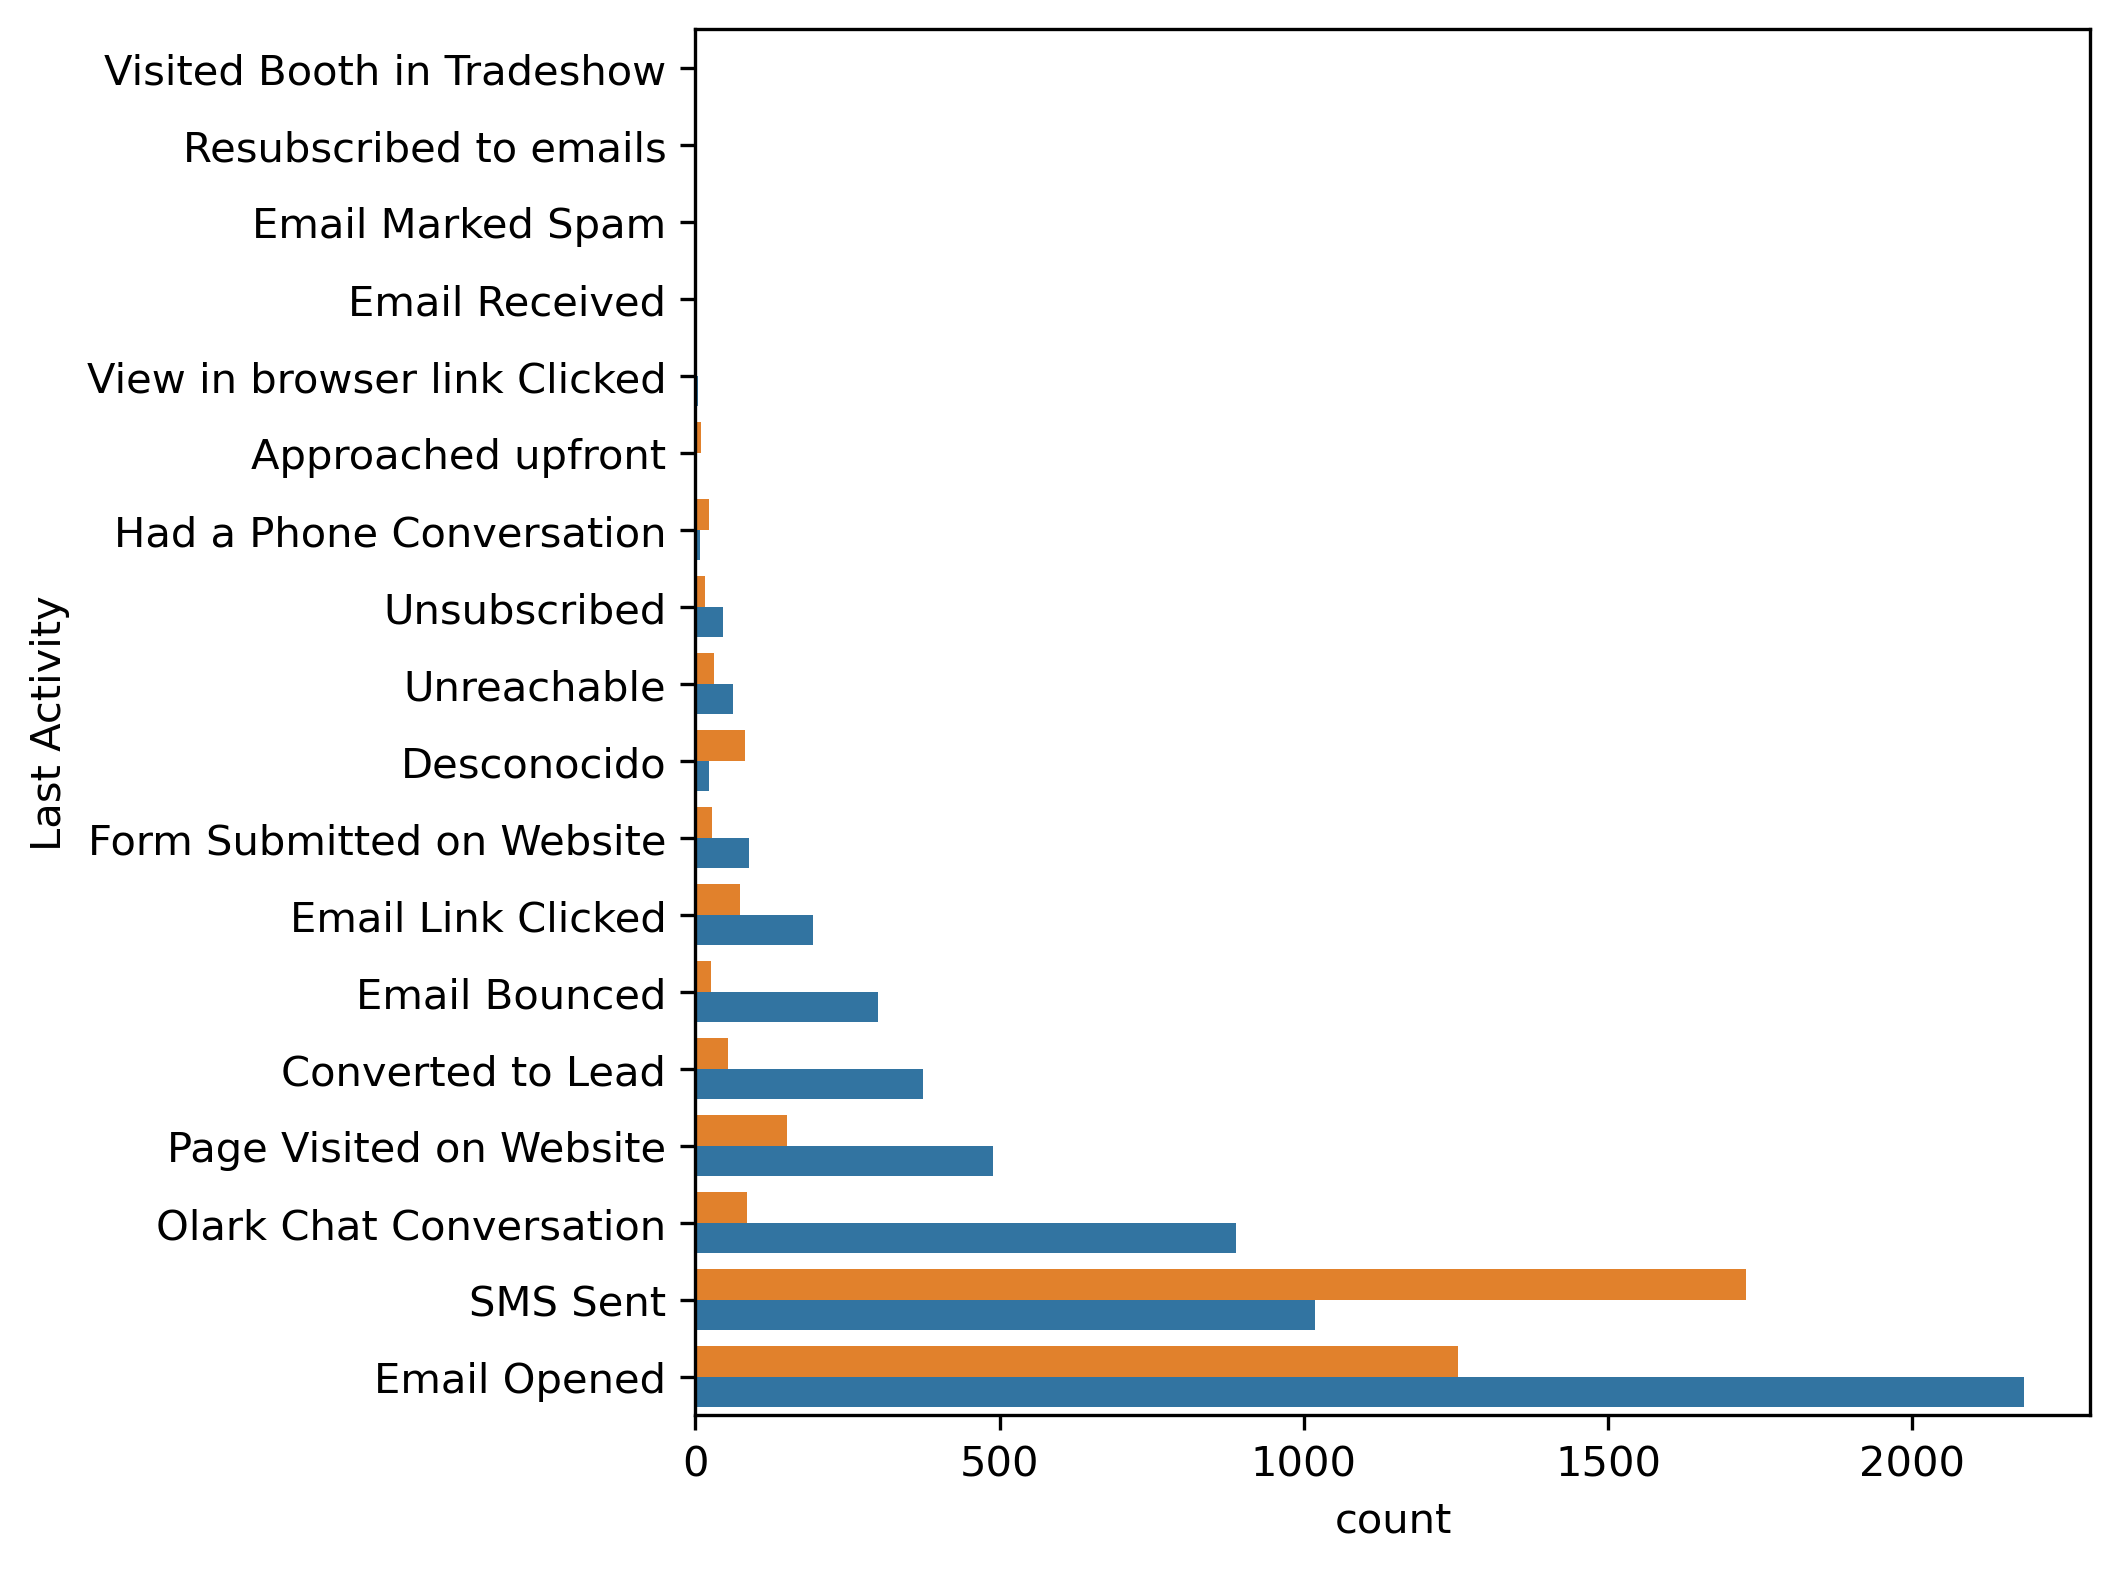

In [97]:
# Análisis Exploratorio de una Variable: Last Activity

conteo_de_convertidos('Last Activity')

La Última Actividad con la tasa de conversión más alta es, con diferencia, el Envío de SMS.

Se requiere una investigación más detallada para determinar si esto es resultado de la eficacia de esta actividad o simplemente la etapa en la que se lleva a cabo en el proceso de nutrición de leads.

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

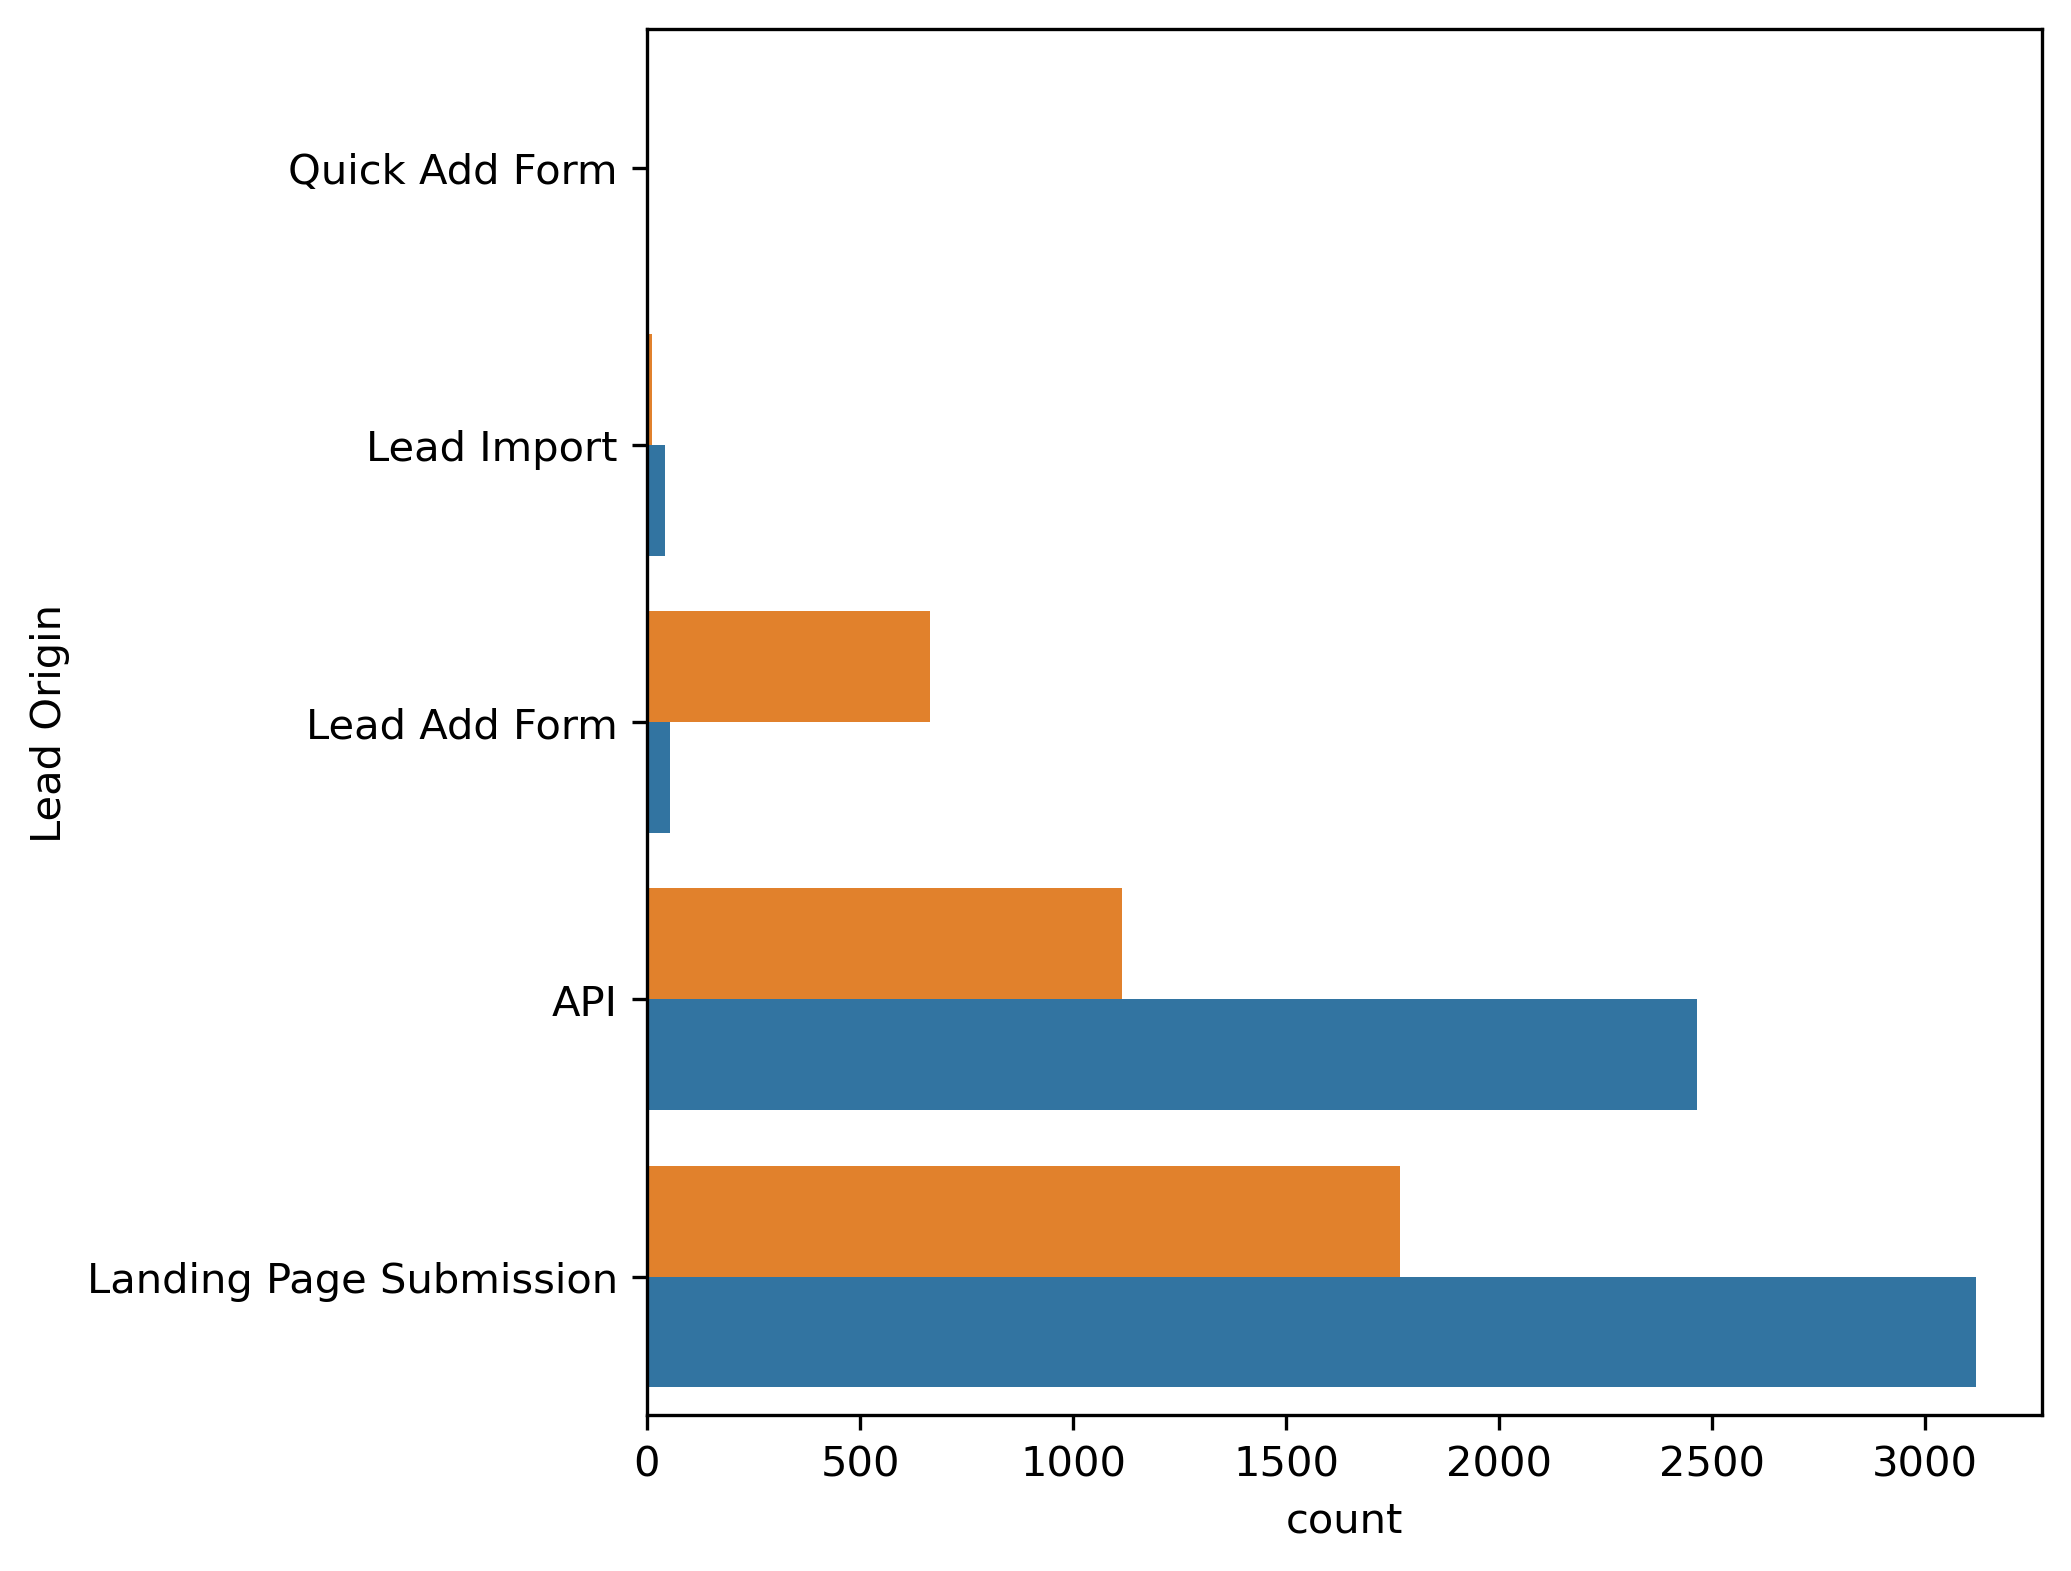

In [98]:
# Análisis Exploratorio de una Variable: Lead Origin

conteo_de_convertidos('Lead Origin')

Significativamente más prospectos se convierten cuando se originan a través del formulario de 'Añadir Prospecto'. 

La tasa de conversión de prospectos parece ser ligeramente mayor entre aquellos que se originan desde 'Envío de Página de Aterrizaje' que desde 'API'.

# Análisis Exploratorio de las Variables Booleanas

In [99]:
# Creamos la función matriz_de_confusion para graficar el mapa de calor de la matriz de confusión de una característica 
# booleana versus Convertidos y agregar etiquetas relevantes. Será de mucha utilidad para las variables booleanas.


In [117]:
def matriz_de_confusion(independiente, dependiente = 'Converted'):
    mdc=confusion_matrix(df[independiente], df[dependiente])
    plt.figure(figsize=(4,4), dpi = 300)
    sns.heatmap(mdc, annot=True, fmt='', xticklabels=['No','Yes'], yticklabels=['No','Yes'], cmap='Blues')
    plt.title("Matriz de Confusión " + independiente + " vs. " + dependiente)
    plt.xlabel(dependiente)
    plt.ylabel(independiente)
    plt.show()

In [118]:
# Matriz de Confusión de 'Get updates on DM Content' vs. 'Converted'

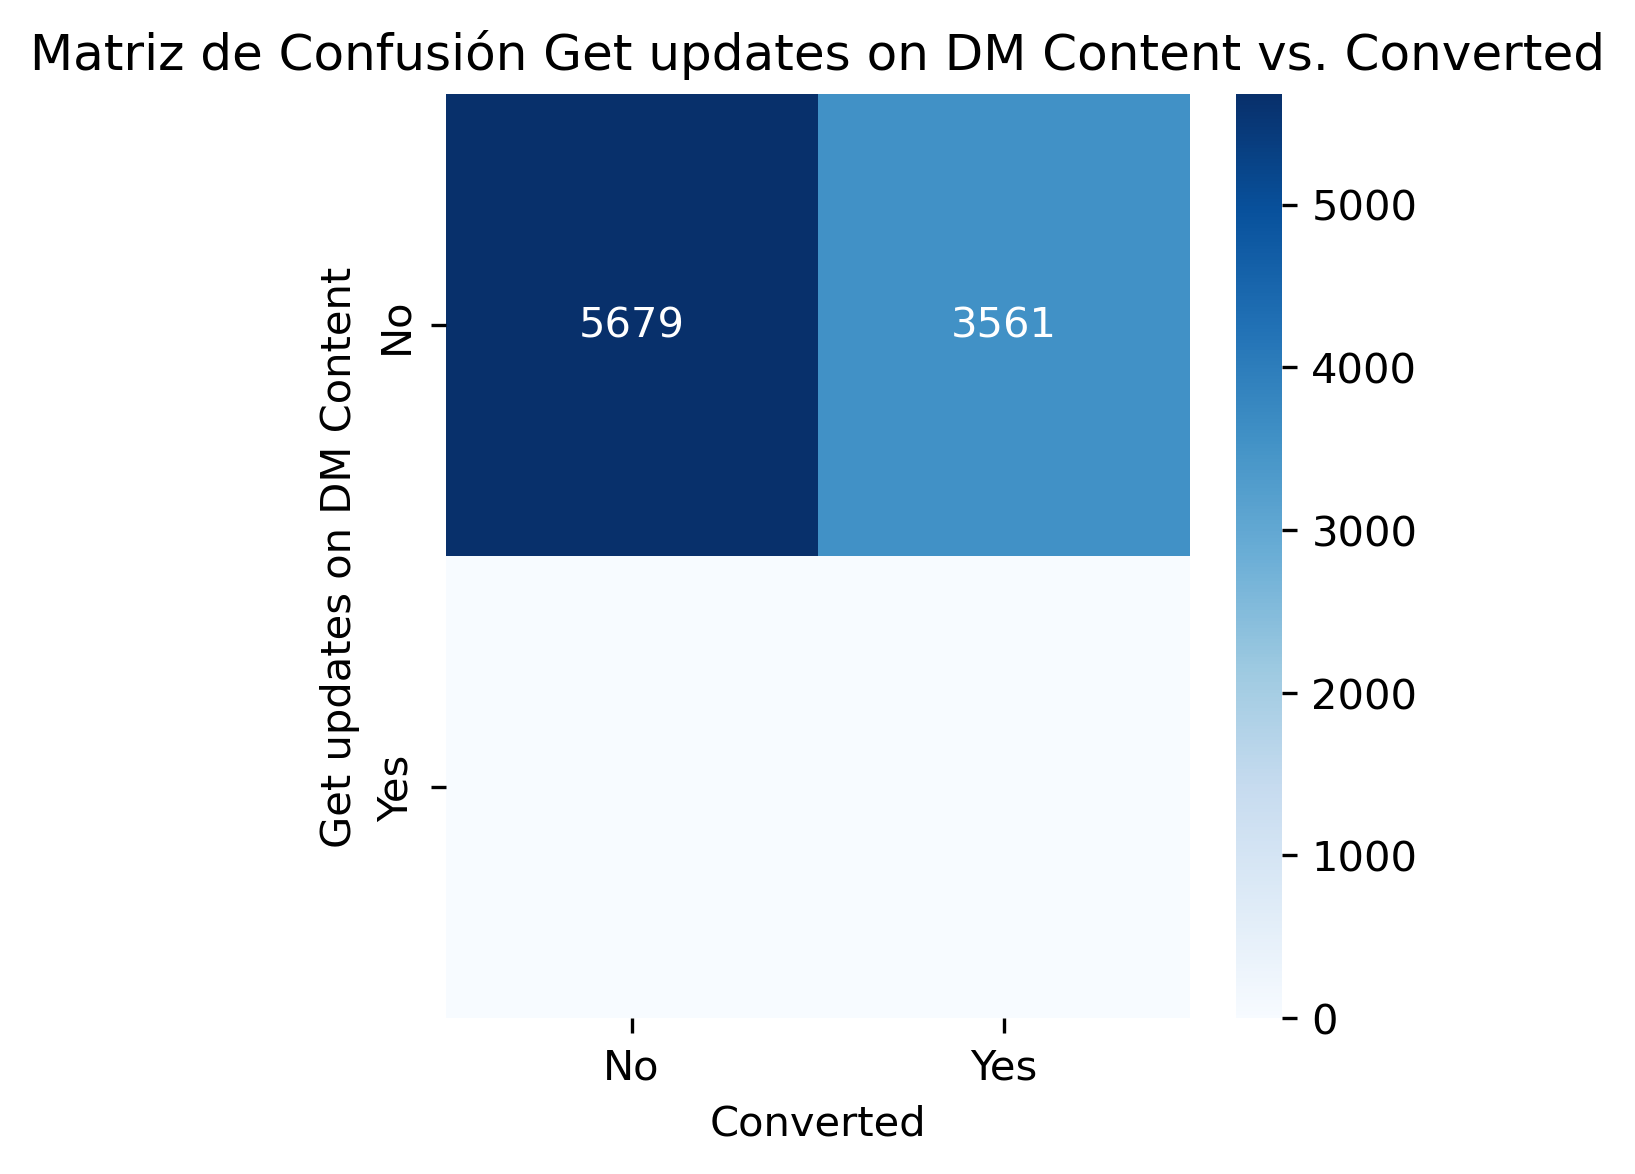

In [119]:
matriz_de_confusion('Get updates on DM Content')

Ningún prospecto indicó que quisiera recibir actualizaciones sobre contenido de DM (Marketing Directo).
Enviar este tipo de contenido a los prospectos evidentemente no es de su interés, tanto para los que no se inscribieron como para los que finalmente si se inscribieron.

In [120]:
# Matriz de Confusión de 'Do Not Email' vs. 'Converted'

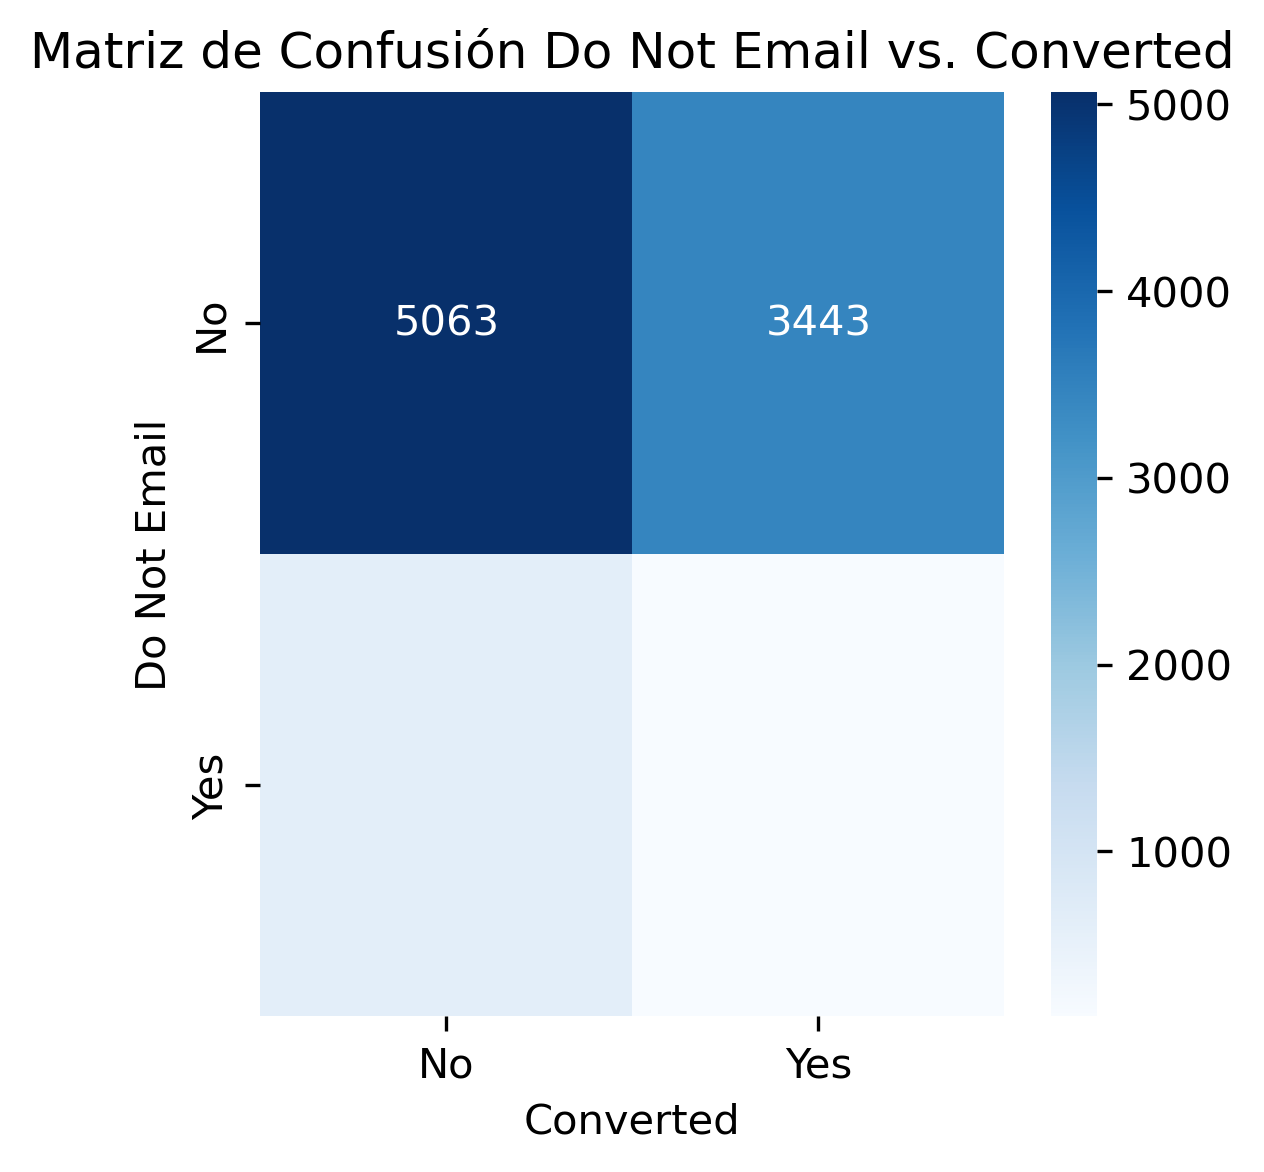

In [121]:
matriz_de_confusion('Do Not Email')

La gran mayoría de los prospectos indican "No" en la opción de No Enviar Correo Electrónico, sugiriendo que el equipo de ventas tiene libertad para contactarlos por correo electrónico.

La tasa de conversión entre los prospectos que indican "No" en la opción de No Llamar es del 40.47% = 3443/(5063+3443)

Muy pocos prospectos tienen un "Sí" en la opción de No Enviar Correo Electrónico (7.94% = (616+118)/9240). La tasa de conversión entre estos es de sólo el 16.08% = 118/(616+118). Desde que indican no ser contactados podemos ver su falta de interés para inscribirse.

In [122]:
# Matriz de Confusión de 'A free copy of Mastering The Interview' vs. 'Converted'

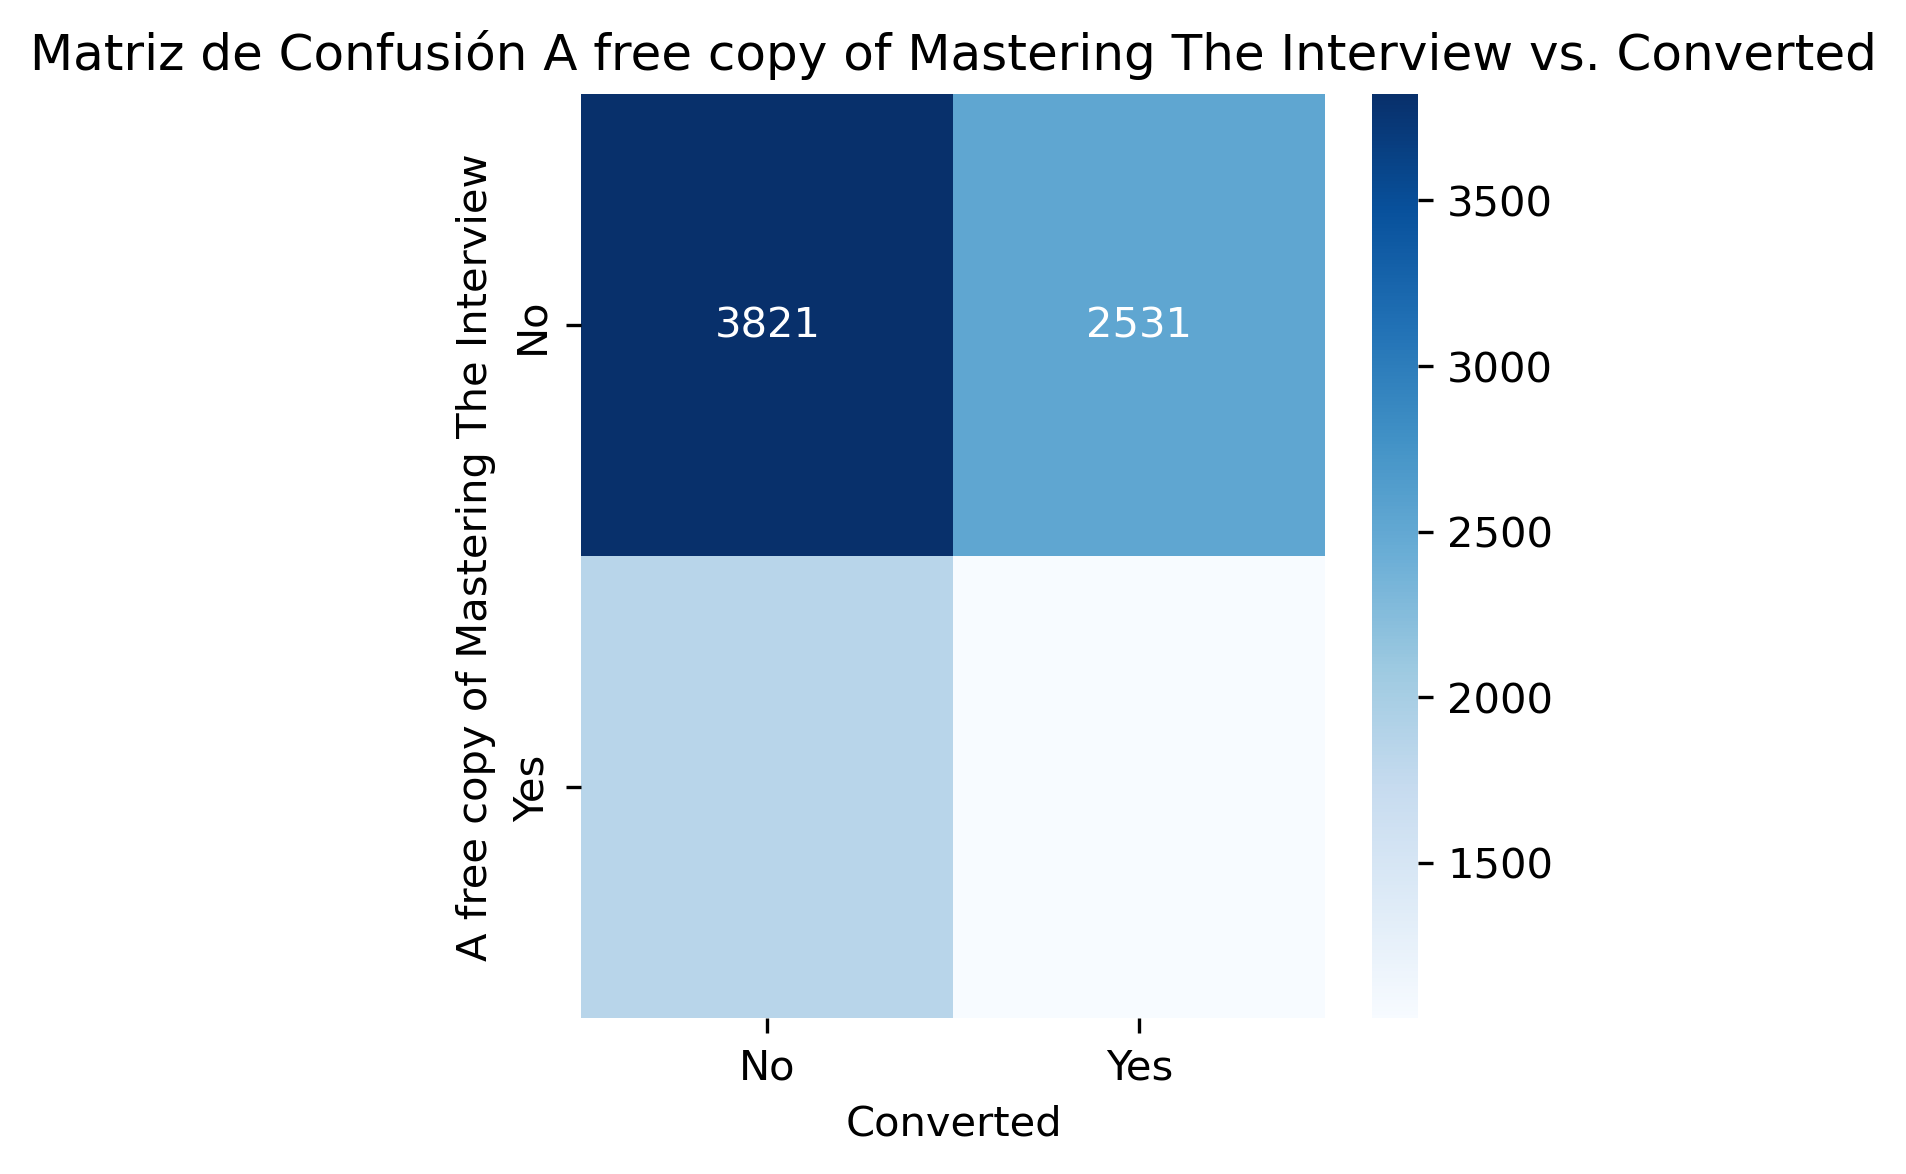

In [123]:
matriz_de_confusion('A free copy of Mastering The Interview')

Casi 1/3 de los prospectos querían recibir una copia gratuita de del libro 31.3% = (1858+1030)/9240.

Curiosamente, los prospectos que recibieron una copia gratuita del libro tuvieron una tasa de conversión más baja (35.7% = 1030/(1858+1030) que los que no lo recibieron (39.8% = 2531/(3821+2531)

¿Podría ser esto porque una vez que los prospectos reciben una copia de "Dominando la Entrevista", no sienten la necesidad de los cursos? ¿Sólo dieron sus datos para obtener el contenido gratuito?

# Análisis Exploratorio de Variables Numéricas

In [124]:
#Definicion de la función de Gráfico de Caja y Bigote

In [135]:
def grafico_de_caja(independiente, dependiente = 'Converted'):
    plt.figure(figsize=(4,4), dpi=300)
    sns.boxplot(y=independiente, data=df, x = dependiente, hue = dependiente)
    plt.title('Grafico de Caja de ' + independiente + ' por valores V/F de ' + dependiente )
    plt.show()
              

In [136]:
# Gráfico de Caja de 'Total Time Spent on Website'

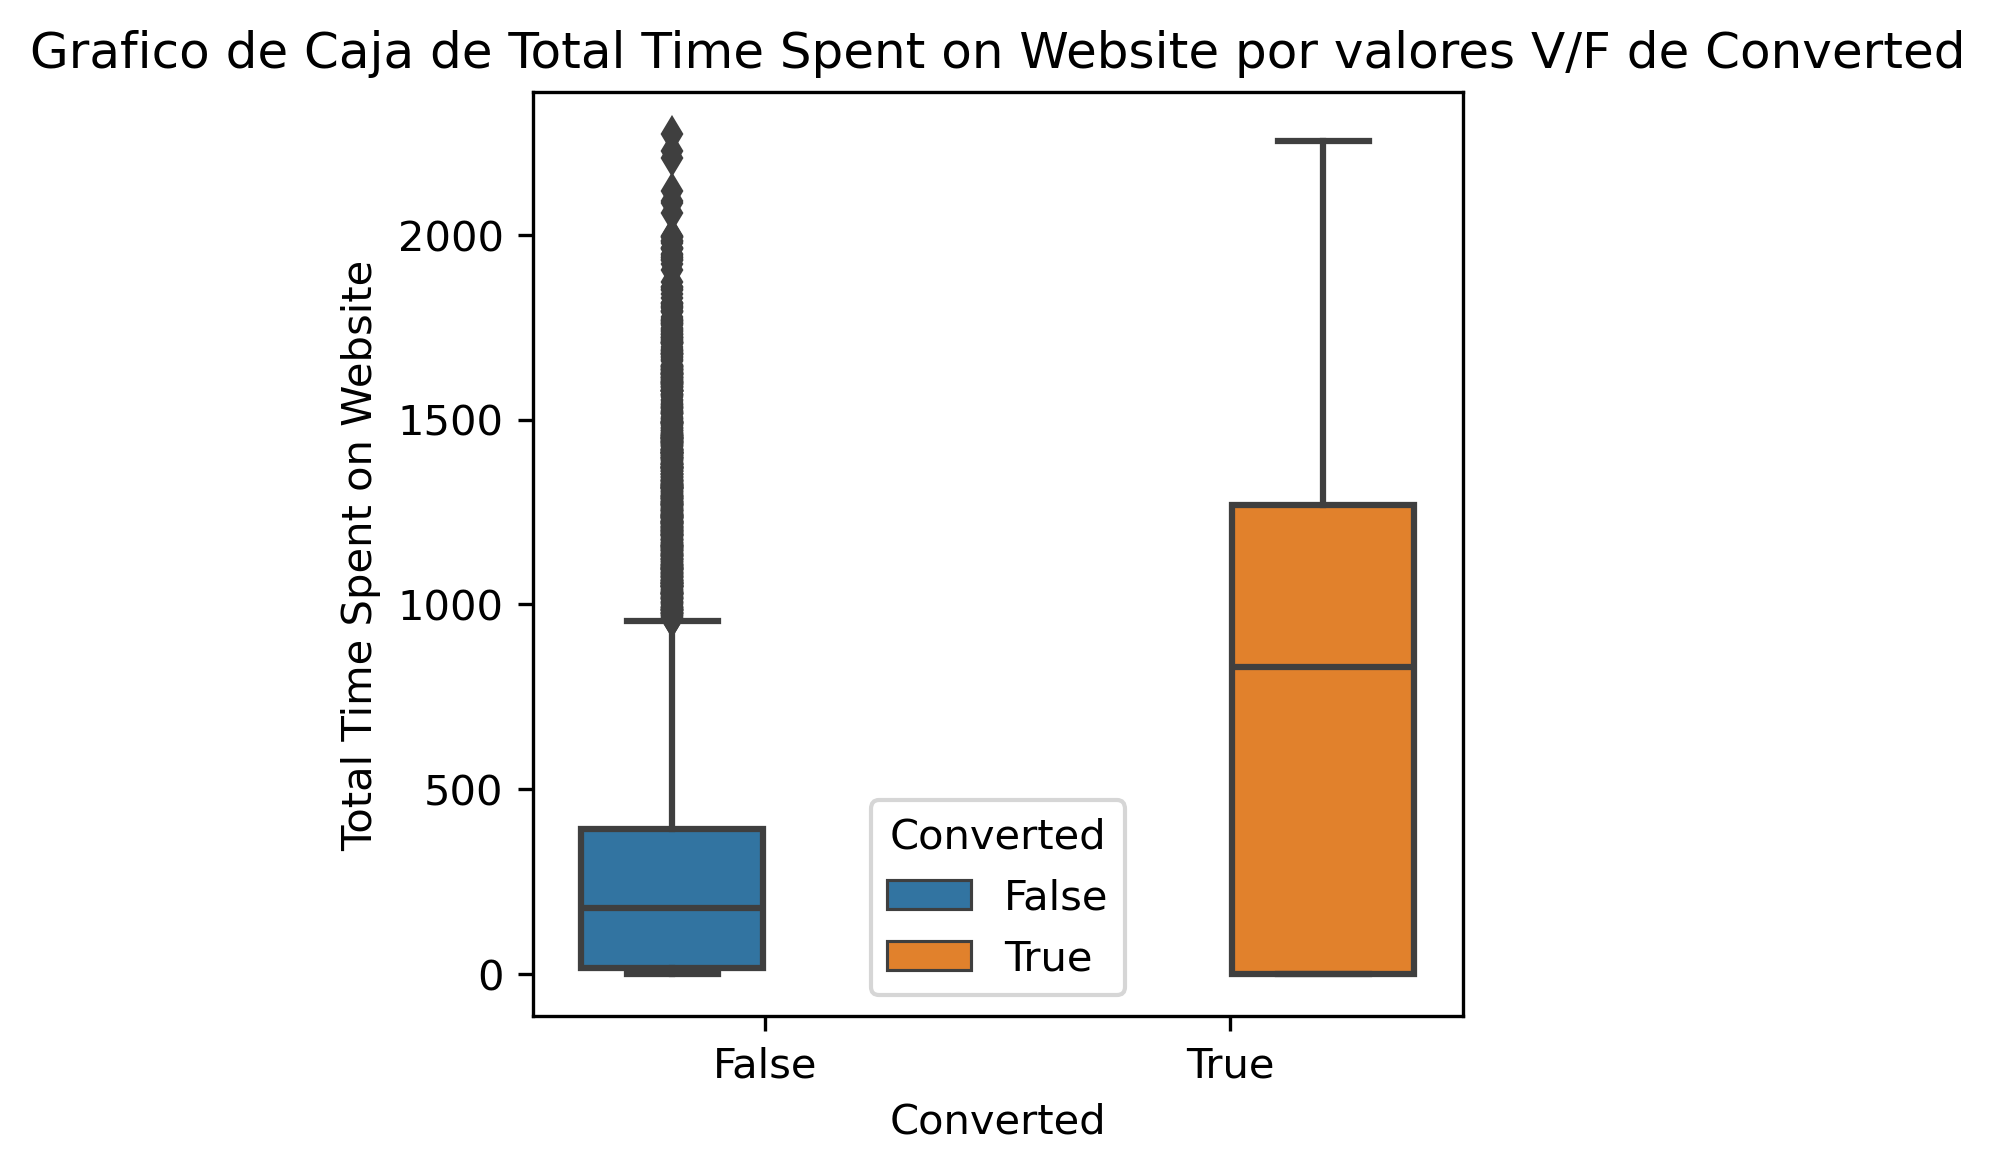

In [137]:
grafico_de_caja('Total Time Spent on Website')

# Insights:

El Rango Intercuartílico (IQR) del Tiempo Total Gastado en el Sitio Web para los prospectos que se convierten es mucho mayor que para los que no se convierten.

Es posible que incentivar a los prospectos a pasar más tiempo en el sitio web aumente la tasa de conversión general.

Incluso, podría concentrarme en aquellos leads que pasaron un tiempo significativo en el sitio web, pero no compraron. Posiblemente estén interesados y deba poner mayor esfuerzo en cerrar la venta.

In [138]:
# Gráfico de Caja de 'Page Views Per Visit'

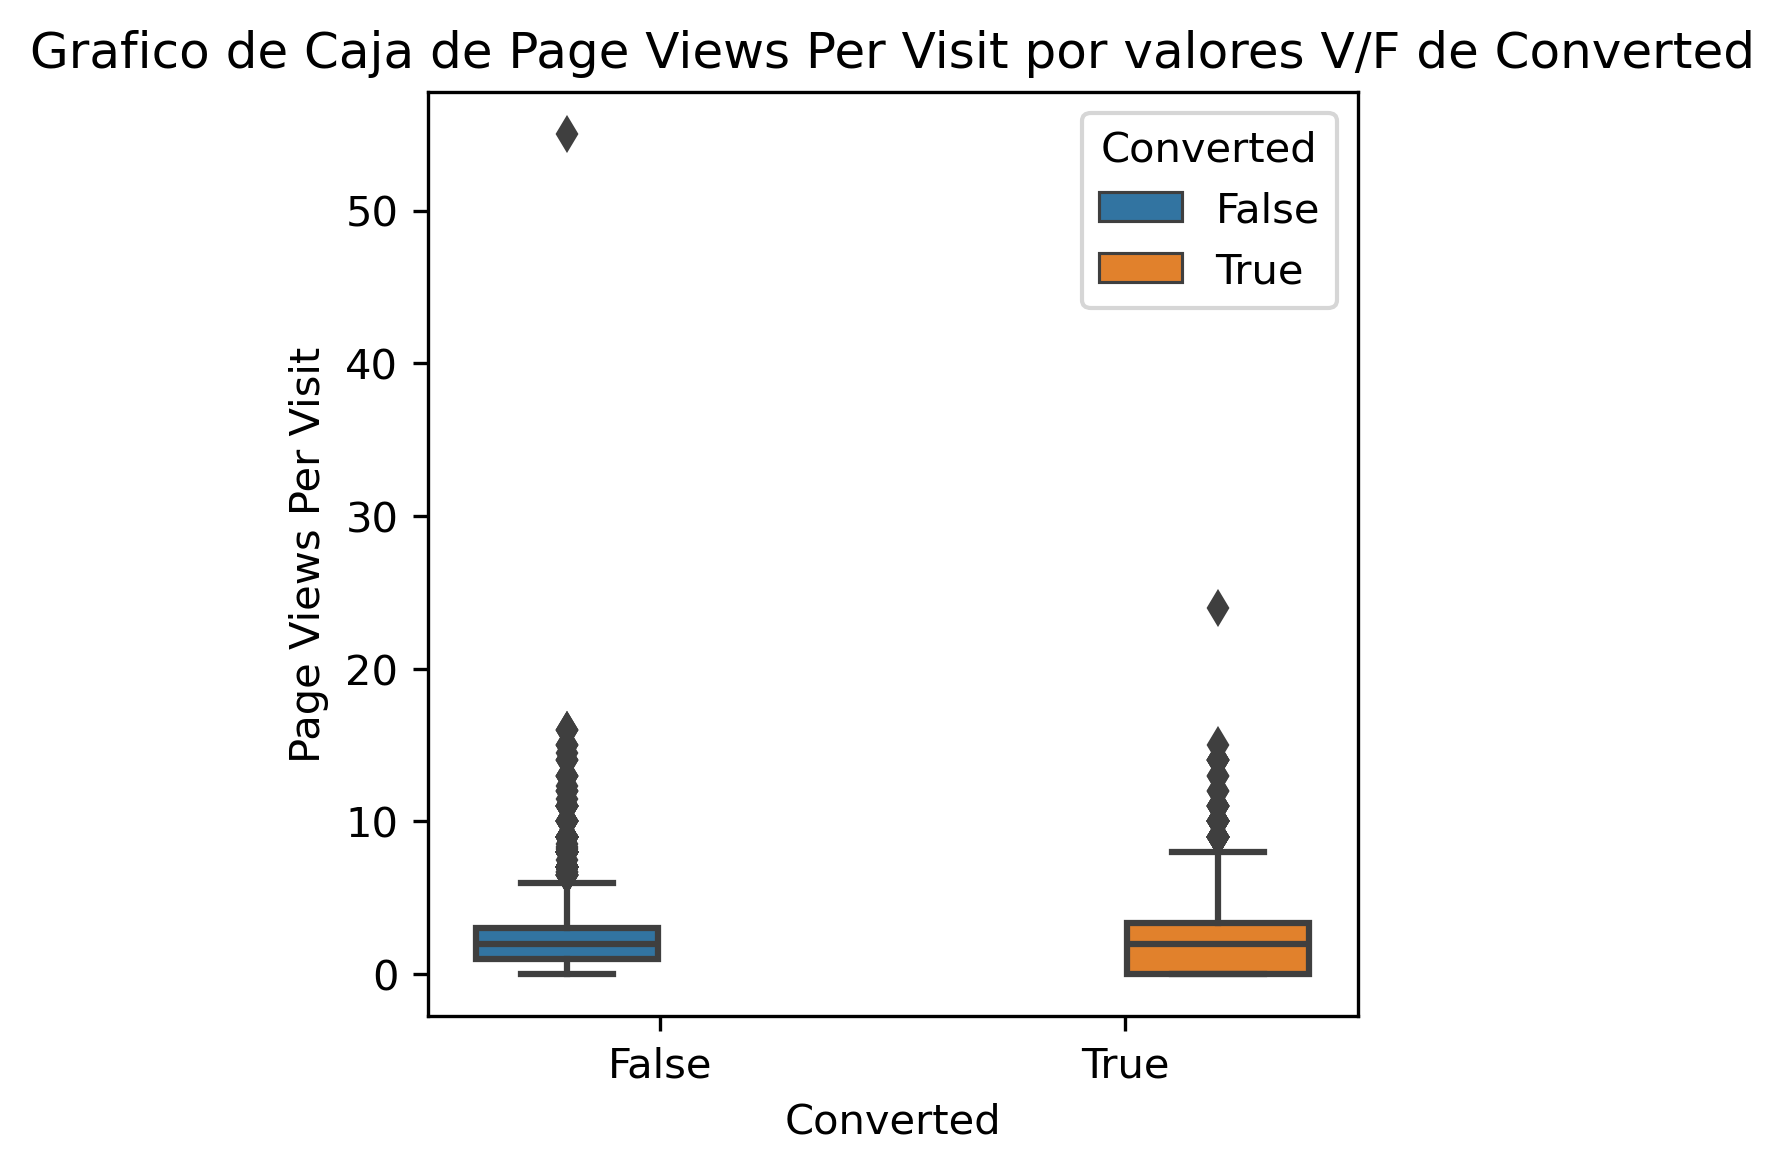

In [139]:
grafico_de_caja('Page Views Per Visit')

Todas las oportunidades de venta parecen ver un número similar de páginas por visita en promedio, independientemente del estado de conversión.

Sin embargo, el Rango Intercuartílico (IQR) de Vistas de Página Por Visita es mayor para las oportunidades de venta que se convierten, en parte porque una gran parte de las oportunidades que se convierten tienen un promedio de 0 vistas de página por visita.

El valor atípico que vio 55 páginas por visita en promedio podría no ser una oportunidad de venta, sino de hecho un competidor o un miembro del personal consultando el sitio web.

In [140]:
# Gráfico de Caja de 'TotalVisits'

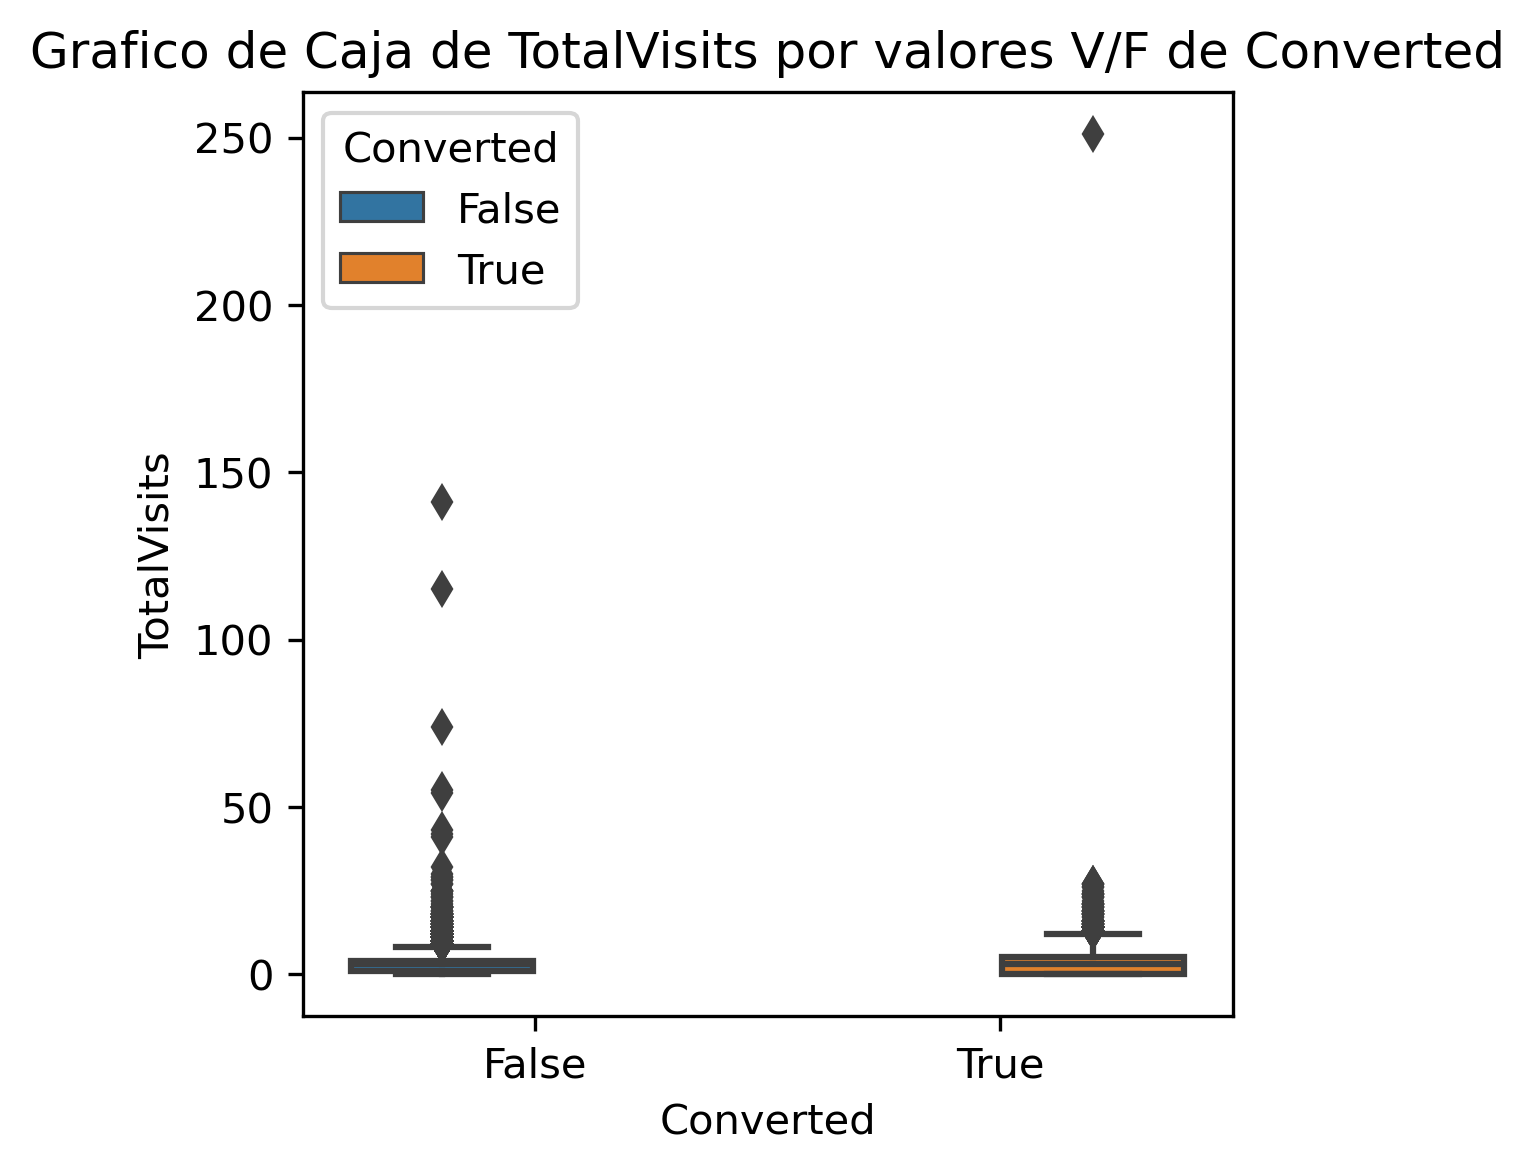

In [141]:
grafico_de_caja('TotalVisits')

 No es posible interpretarlo por la dispersión de los outliers. Removamos los leads con mas de 30 Visitas al sitio web

<Axes: xlabel='Converted', ylabel='TotalVisits'>

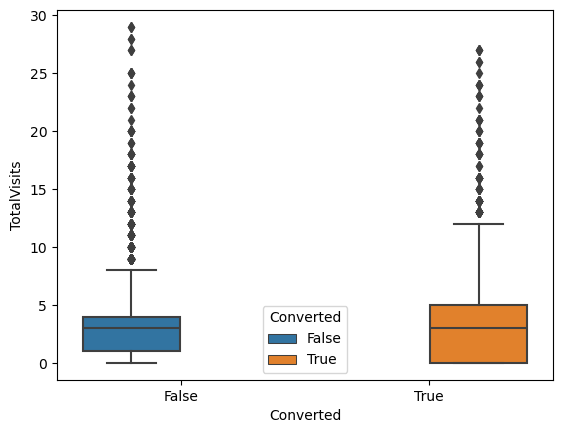

In [142]:
sns.boxplot(y='TotalVisits', data = df[df['TotalVisits']<30], x= 'Converted', hue = 'Converted')

Además de visitar el sitio web con más frecuencia, los leads de venta que se convierten parecen mostrar una mayor dispersión y Rango Intercuartílico (IQR) que los leads que no se convierten.

# DESARROLLO DEL MODELO DE REGRESIÓN LOGÍSTICA

Identificamos los predictores del modelo (todas las variables de df con excepción de 'Converted' que es la variable dependiente). También generaremos variables dummies a partir de las variables categóricas.

In [144]:
# Botamos la variable dependiente y generamos las dummies de las categóricas

In [145]:
X = pd.get_dummies(df.drop(columns='Converted', axis=1))

In [146]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,False,False,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660728,False,False,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660727,False,False,2.0,1532,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660719,False,False,1.0,305,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660681,False,False,2.0,1428,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [149]:
Y = df['Converted']

Ahora, dividimos nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (el 80% de los datos se utilizarán para el conjunto de entrenamiento, mientras que el 20% restante se utilizará en el conjunto de prueba).

In [150]:
X_entrenamiento, X_evaluacion, Y_entrenamiento, Y_evaluacion = train_test_split(X,Y, test_size = 0.2, random_state = 99, stratify = Y)

El parámetro stratify = Y en train_test_split asegura que la proporción de clases en los conjuntos de entrenamiento y evaluación sea la misma que la proporción de clases en el conjunto de datos original Y. El cual, es crucial para mantener una distribución representativa y equilibrada de las clases, especialmente en casos de desequilibrio significativo entre ellas.

Ajuste de Escala de las Variables


El ajuste de escala de las variables es un paso esencial para mejorar la eficacia de los modelos de clasificación, ya que estos predictores numéricos suelen variar en magnitud y escala. En nuestro conjunto de datos, las variables numéricas a considerar son:


Total de Visitas

Tiempo Total en el Sitio Web

Vistas de Página por Visita

Cuando estas variables no se distribuyen de manera normal, lo cual es nuestro caso, se recomienda el uso de la técnica de MinMaxScaler para su estandarización. Este método ajusta los datos dentro de un rango específico, usualmente de 0 a 1, y es particularmente útil cuando no asumimos una distribución normal en nuestras variables.

Por otro lado, cuando los datos sí presentan una distribución normal, la normalización —o estandarización Z— suele ser la opción más adecuada. Este proceso transforma los datos para que tengan una media de cero y una desviación estándar de uno, lo que corresponde a la distribución normal estándar. La normalización es muy útil porque muchos algoritmos de machine learning —como aquellos que utilizan medidas de distancia— operan bajo la premisa de que los datos se distribuyen normalmente.

En resumen, mientras que la estandarización MinMax es óptima para datos con rangos dispares y sin distribución normal, la normalización Z es ideal para datos que ya se ajustan a una distribución normal, facilitando la comparación y la interpretación de los coeficientes en modelos lineal

es, por ejemplo.

In [151]:
# Escalado de variables utilizando MixMaxScaler

In [152]:
# Generamos la lista de variables escalar

In [153]:
var_escalar = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [154]:
# Creamos la instancia MinMaxScaler

In [155]:
escalar = MinMaxScaler()

In [156]:
# Transformamos las variables con MixMaxScaler
# Primero la base de entrenamiento

In [158]:
X_entrenamiento[var_escalar] = escalar.fit_transform(X_entrenamiento[var_escalar])

In [159]:
X_entrenamiento.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
627877,False,False,0.015936,0.672975,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
585642,False,False,0.015936,0.079225,0.036364,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
617566,False,False,0.023904,0.453345,0.054545,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
655639,False,False,0.015936,0.001320,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
593227,False,False,0.003984,0.210387,0.018182,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Ahora la base de evaluación:
En el escalado de datos, utilizamos fit_transform en el conjunto de entrenamiento para calcular los parámetros de escalado (como mínimo y máximo) y luego aplicar la transformación. En cambio, para el conjunto de evaluación, solo usamos transform para aplicar los mismos parámetros ya calculados, asegurando así la coherencia y evitando el sesgo en nuestro modelo.

In [160]:
X_evaluacion[var_escalar] = escalar.transform(X_evaluacion[var_escalar])

In [161]:
X_evaluacion.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
591899,False,False,0.015936,0.173856,0.024182,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
604007,False,False,0.019920,0.412852,0.090909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
653773,False,False,0.011952,0.111356,0.054545,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
611519,False,False,0.015936,0.699384,0.072727,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
584568,False,False,0.007968,0.014525,0.036364,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Hacer la escalada de los datos con MinMaxScaler después de dividir el conjunto en entrenamiento y evaluación, en lugar de antes, es una práctica recomendada para evitar la fuga de datos. Cuando escalas los datos antes de la división, el proceso de escalado tiene en cuenta toda la distribución de los datos, incluidos los del conjunto de evaluación, lo que puede llevar a una evaluación optimista e irreal del rendimiento del modelo. Al escalar después de la división, te aseguras de que el proceso de escalado solo se base en los datos de entrenamiento, manteniendo así la validez de la evaluación en el conjunto de prueba, que simula datos no vistos.

In [162]:
# Crear el modelo de regresión logística

modelo_rl = LogisticRegression()

In [163]:
# Entrenamos el modelo con los datos de entrenamiento

In [164]:
modelo_rl.fit(X_entrenamiento, Y_entrenamiento)

C:\Users\ALLAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
# Predecir las probabilidades en el conjunto de evaluación

In [166]:
Y_prediccion = modelo_rl.predict_proba(X_evaluacion)[:,1]

Al usar modelo_rl.predict_proba(X_evaluacion)[:, 1], seleccionamos la segunda columna de la salida, que representa la probabilidad de que la observación pertenezca a la clase 1 (es decir, la clase positiva o 'Converted' en nuestro caso). Esto es porque predict_proba devuelve un array de dos columnas para una regresión logística binaria, donde la primera columna es la probabilidad de la clase 0 y la segunda es la probabilidad de la clase 1.

In [167]:
Y_prediccion

array([0.37059227, 0.90677753, 0.07382558, ..., 0.15232063, 0.98167491,
       0.04780481])

# AUC y ROC


In [168]:
# Calcular el área bajo la curva (AUC)
# Estimemos fpr y tpr desde la función roc_curve

La función roc_curve genera varios puntos de corte y calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) para cada uno de ellos. La curva ROC es una representación gráfica de estos pares de TPR y FPR en diferentes umbrales, proporcionando una visión integral de la capacidad del modelo para discriminar entre las clases a través de una variedad de puntos de corte.

La función roc_curve de la biblioteca sklearn.metrics calcula los valores de la Tasa de Falsos Positivos (fpr), la Tasa de Verdaderos Positivos (tpr), y los umbrales de decisión correspondientes, a partir de las etiquetas verdaderas y las probabilidades de predicción. Estos valores se generan como tres arrays separados que nosotros almacenamos directamente en las variables fpr, tpr y puntos_de_corte.

In [172]:
fpr, tpr, puntos_de_corte = roc_curve(Y_evaluacion, Y_prediccion)

In [173]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.80281690e-04,
       8.80281690e-04, 8.80281690e-04, 8.80281690e-04, 8.80281690e-04,
       1.76056338e-03, 1.76056338e-03, 2.64084507e-03, 2.64084507e-03,
       2.64084507e-03, 2.64084507e-03, 2.64084507e-03, 2.64084507e-03,
       3.52112676e-03, 3.52112676e-03, 3.52112676e-03, 3.52112676e-03,
       3.52112676e-03, 3.52112676e-03, 3.52112676e-03, 3.52112676e-03,
       4.40140845e-03, 4.40140845e-03, 5.28169014e-03, 5.28169014e-03,
       6.16197183e-03, 6.16197183e-03, 6.16197183e-03, 6.16197183e-03,
       7.04225352e-03, 7.04225352e-03, 7.04225352e-03, 7.92253521e-03,
       7.92253521e-03, 7.92253521e-03, 8.80281690e-03, 8.80281690e-03,
       9.68309859e-03, 9.68309859e-03, 9.68309859e-03, 1.32042254e-02,
       1.32042254e-02, 1.32042254e-02, 1.32042254e-02, 1.40845070e-02,
       1.40845070e-02, 1.58450704e-02, 1.58450704e-02, 1.67253521e-02,
      

In [174]:
tpr

array([0.        , 0.00140449, 0.00702247, 0.01544944, 0.02106742,
       0.0238764 , 0.07724719, 0.07724719, 0.08286517, 0.08707865,
       0.08988764, 0.10252809, 0.10252809, 0.14747191, 0.14747191,
       0.15308989, 0.16573034, 0.20505618, 0.20786517, 0.22191011,
       0.22191011, 0.2247191 , 0.23033708, 0.26544944, 0.26825843,
       0.27106742, 0.2738764 , 0.28370787, 0.28370787, 0.30196629,
       0.30196629, 0.31320225, 0.31320225, 0.31601124, 0.32022472,
       0.33567416, 0.33567416, 0.33707865, 0.34129213, 0.34129213,
       0.34410112, 0.3497191 , 0.3497191 , 0.35674157, 0.35674157,
       0.35955056, 0.36797753, 0.37219101, 0.37640449, 0.38202247,
       0.39325843, 0.39325843, 0.39606742, 0.39606742, 0.39747191,
       0.39747191, 0.40730337, 0.40730337, 0.41573034, 0.41573034,
       0.43117978, 0.43117978, 0.43398876, 0.43398876, 0.46769663,
       0.46769663, 0.47893258, 0.47893258, 0.48174157, 0.48174157,
       0.48455056, 0.48455056, 0.49297753, 0.49297753, 0.49578

In [175]:
puntos_de_corte

array([1.99898003e+00, 9.98980029e-01, 9.98690474e-01, 9.98452958e-01,
       9.98299237e-01, 9.98283194e-01, 9.90066897e-01, 9.90044828e-01,
       9.88729482e-01, 9.88524988e-01, 9.88404234e-01, 9.86276243e-01,
       9.86275257e-01, 9.80649286e-01, 9.80134141e-01, 9.79517755e-01,
       9.79447672e-01, 9.67588139e-01, 9.67358833e-01, 9.62834993e-01,
       9.62691774e-01, 9.62329612e-01, 9.61630113e-01, 9.48660886e-01,
       9.48290514e-01, 9.46272432e-01, 9.46155592e-01, 9.44849503e-01,
       9.44803229e-01, 9.34998197e-01, 9.34177857e-01, 9.29967439e-01,
       9.29966981e-01, 9.29275812e-01, 9.29119808e-01, 9.24200139e-01,
       9.23190125e-01, 9.23076415e-01, 9.22805548e-01, 9.22756696e-01,
       9.21520619e-01, 9.20980170e-01, 9.20975436e-01, 9.18331598e-01,
       9.17325401e-01, 9.17167897e-01, 9.12760214e-01, 9.12323717e-01,
       9.10355922e-01, 9.10274581e-01, 9.06091837e-01, 9.04245118e-01,
       9.02204736e-01, 8.98140933e-01, 8.97721845e-01, 8.97650839e-01,
      

In [176]:
# Calcular el área bajo la curva (AUC)

AUC (Área Bajo la Curva): Es el área bajo la curva ROC. Este valor cuantifica qué tan bueno es el modelo para distinguir entre las clases. Un AUC de 1 significa un modelo perfecto, mientras que un AUC de 0.5 significa un modelo no mejor que un lanzamiento de moneda al azar.

In [177]:
auc_rl = auc(fpr, tpr)

In [178]:
auc_rl

0.9198010217202088

In [179]:
# Graficar la curva ROC

# ROC (Curva Característica de Operación del Receptor): Es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva traza dos parámetros: Tasa de Verdaderos Positivos (Sensibilidad) y Tasa de Falsos Positivos (1 - Especificidad).
         La lógica de la curva ROC es evaluar la capacidad de un modelo para distinguir entre clases a diferentes umbrales de decisión. Al variar el umbral que determina si una muestra es clasificada como positiva o negativa, se obtienen diferentes tasas de verdaderos y falsos positivos. La curva ROC es útil porque muestra el trade-off entre sensibilidad (capturar verdaderos positivos) y especificidad (evitar falsos positivos). El AUC proporciona una medida agregada de rendimiento en todos los umbrales de clasificación posibles. Un modelo que es capaz de maximizar la tasa de verdaderos positivos mientras minimiza la tasa de falsos positivos tendrá un AUC más alto y, por lo tanto, se considera mejor.

In [188]:
plt.figure(figsize = (8,6), dpi = 300)
sns.lineplot(fpr,tpr , label= 'AUC = %0.2f' % auc_rl)
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title ('Curva ROC')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2400x1800 with 0 Axes>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
show()

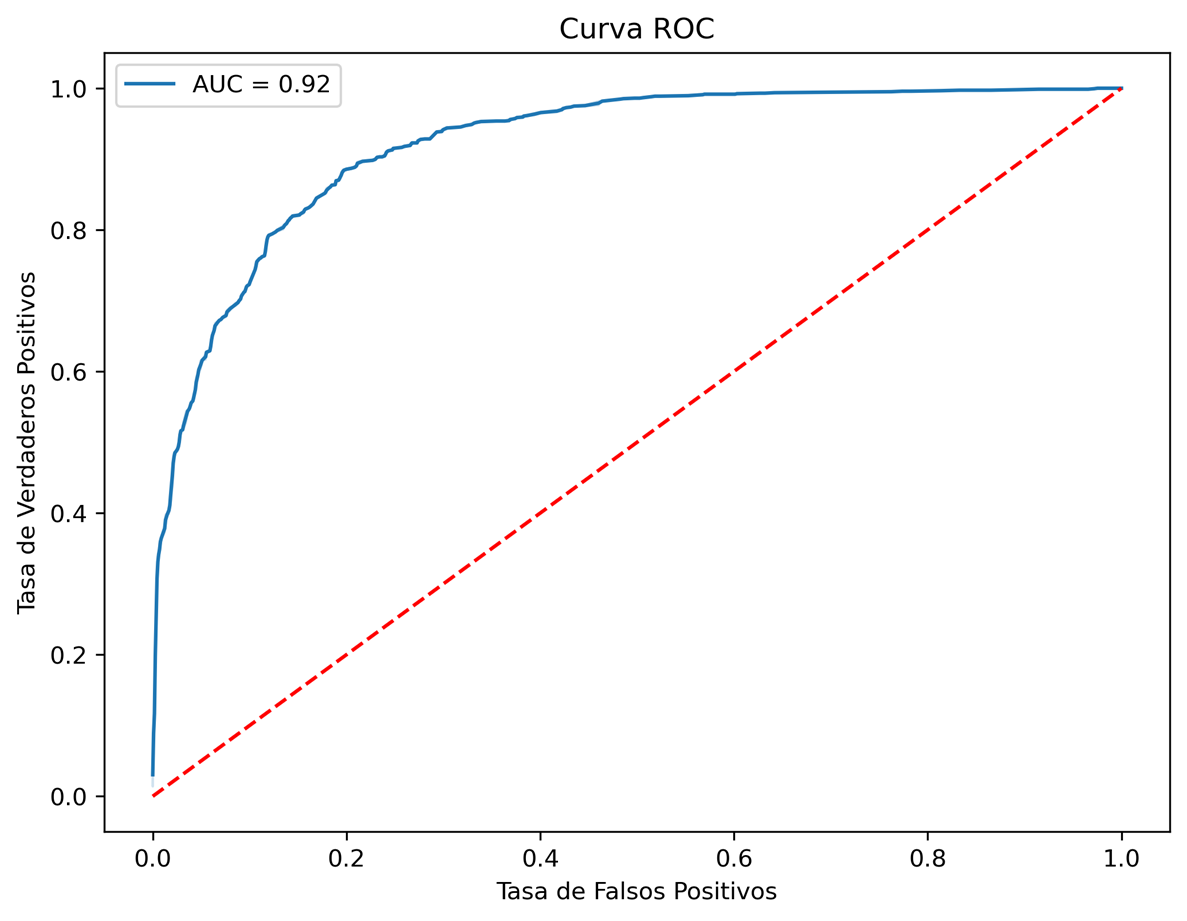



Basado en la curva ROC que ha obtenido con un AUC de 0.92, podemos concluir que el modelo de clasificación ha mostrado un rendimiento muy bueno. Un AUC de 0.92 significa que hay una alta probabilidad de que el modelo clasifique correctamente una observación aleatoria positiva por encima de una negativa. Esto indica que el modelo tiene una excelente capacidad para distinguir entre las dos clases. Sin embargo, es importante destacar que el valor de AUC es aún más informativo cuando se compara con el AUC de otros modelos. En un entorno de modelado práctico, comparamos varios modelos no solo en términos de su AUC sino también considerando otras métricas y el contexto de su aplicación. Por ejemplo, un modelo con un AUC ligeramente inferior podría preferirse si es más interpretable o si se ajusta mejor a las expectativas del negocio. En resumen, este AUC de 0.92 es un resultado alentador y nos proporciona una base sólida para la comparación con otros modelos en nuestra búsqueda para encontrar el mejor ajuste para nuestras necesidades de clasificación.

# Estableciendo Puntos de Corte con apoyo de ChatGPT

El punto de corte óptimo es 0.3391856800911955 con una utilidad máxima de 51650


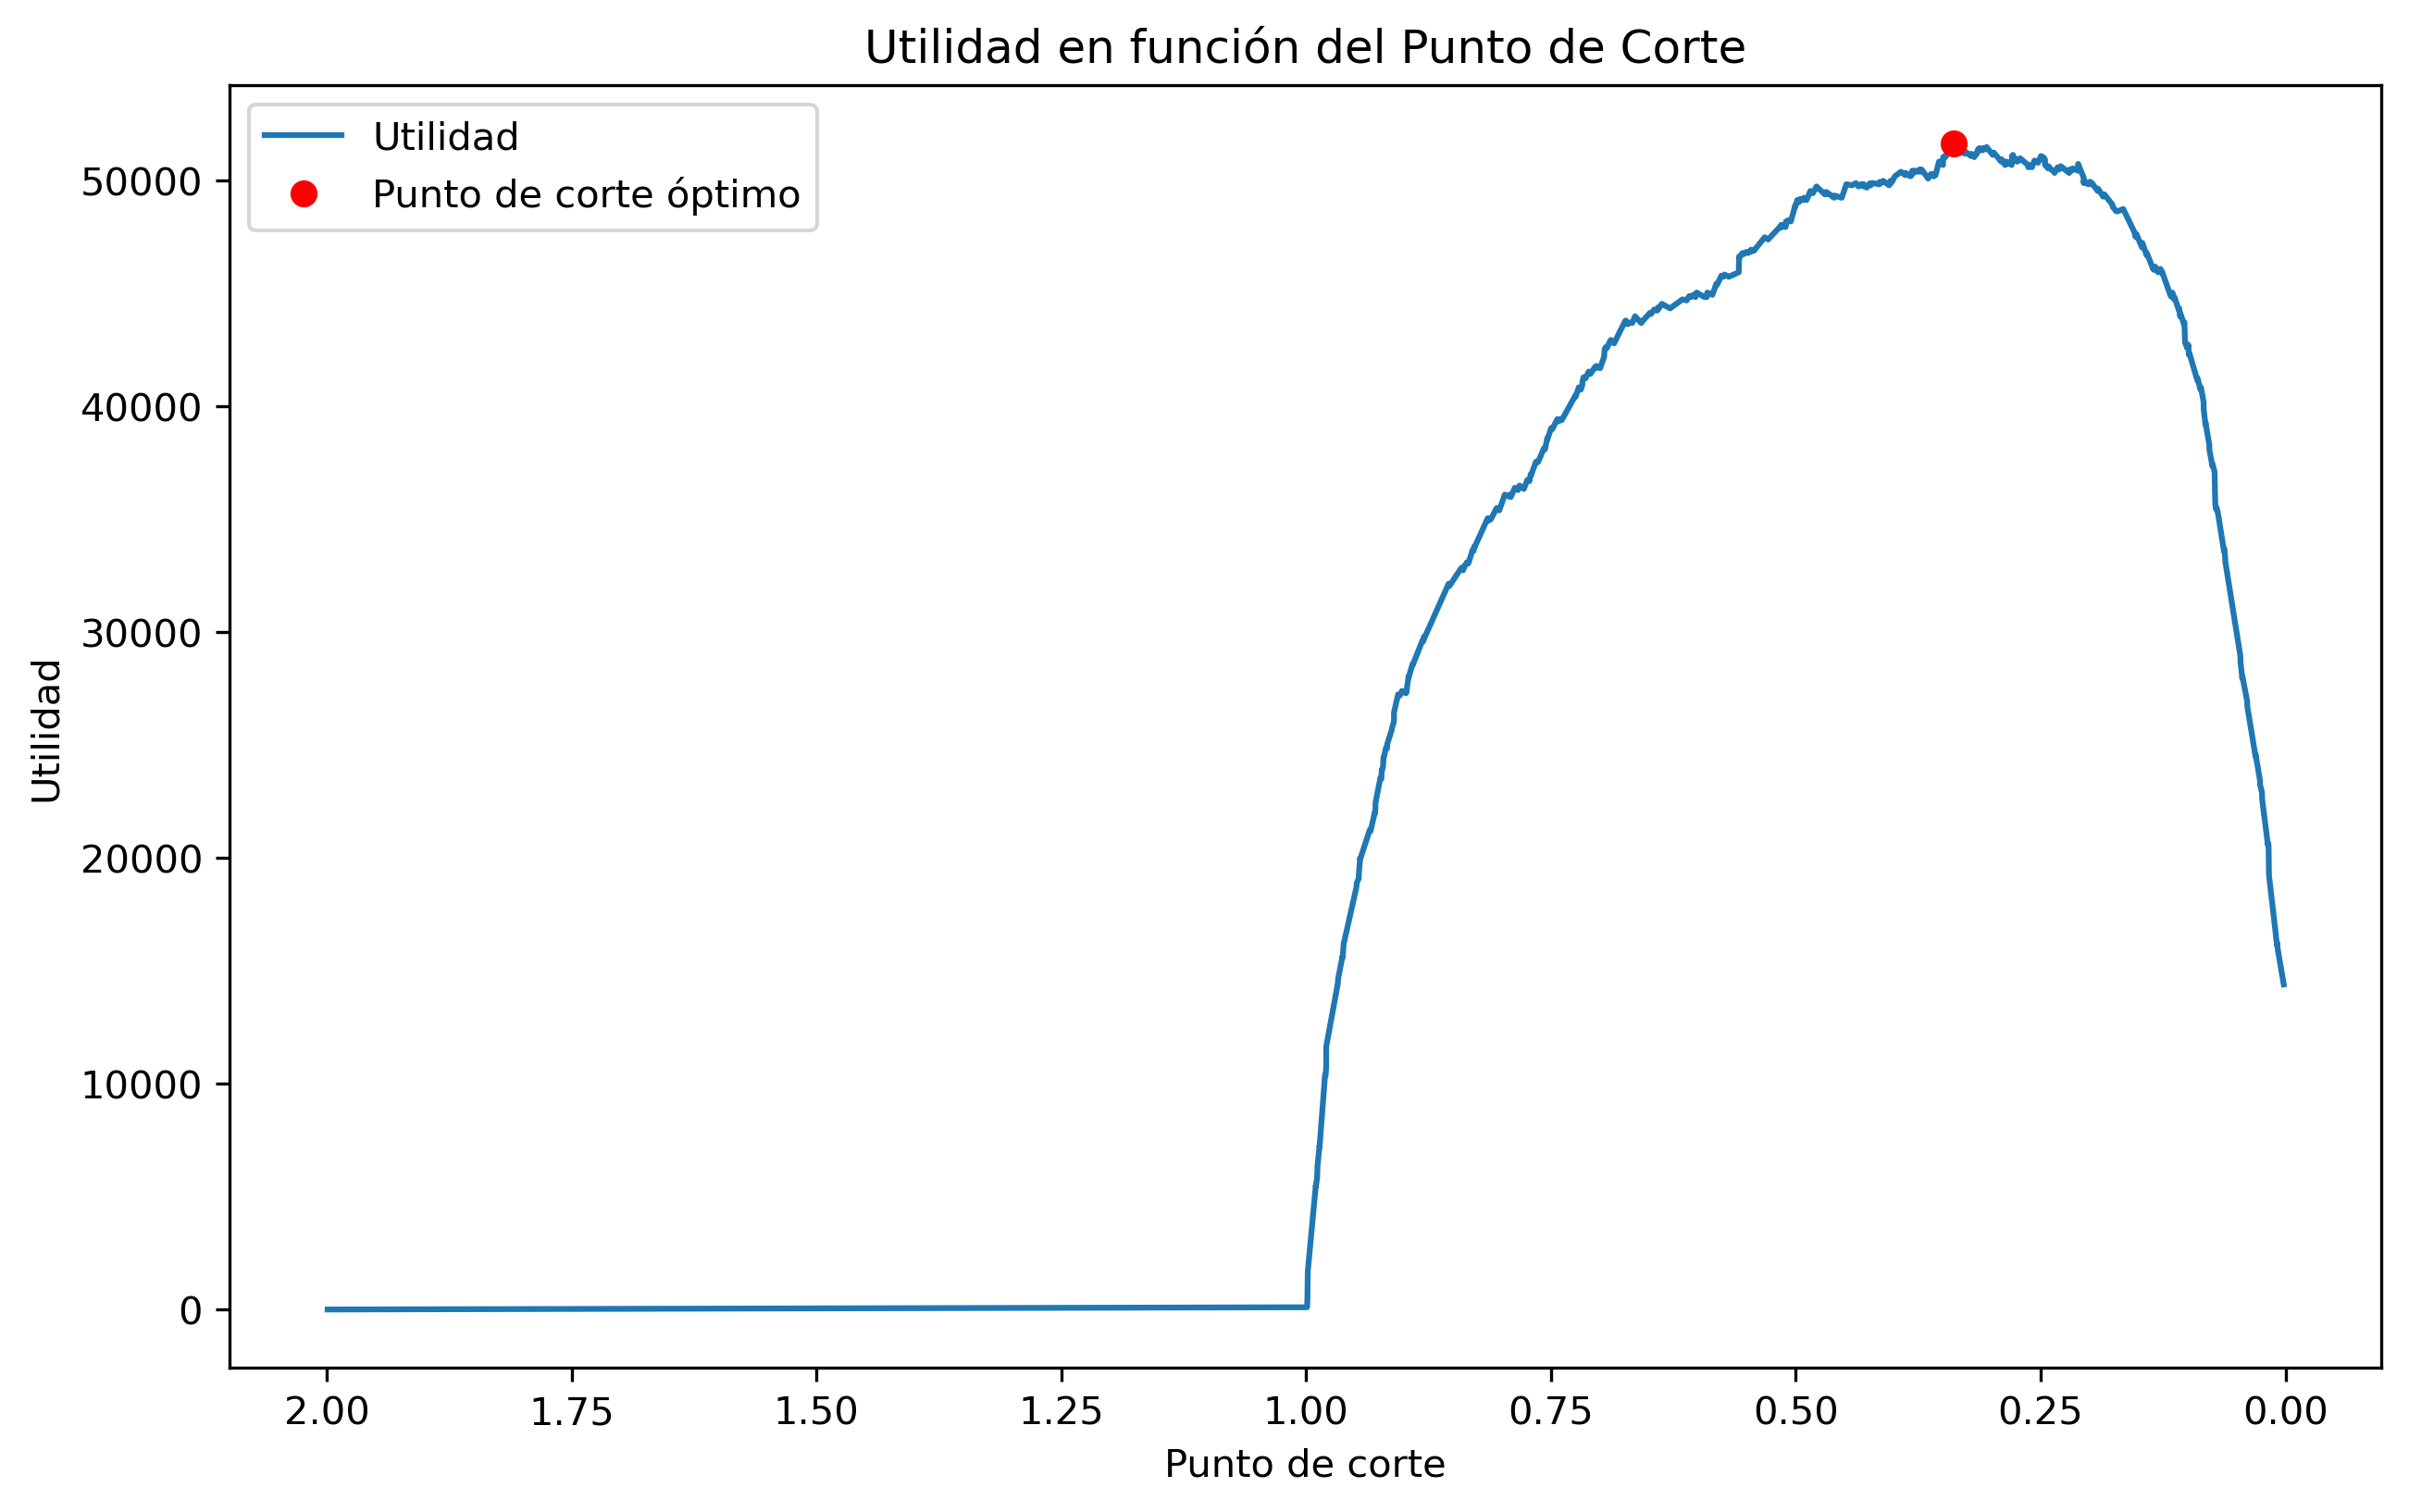

In [189]:
# Reescribir el código utilizando 'puntodecorte' en el bucle for y 'puntos_de_corte' para la lista

# Definimos los costos y beneficios
costo_por_fp = 50  # Costo por cada falso positivo
beneficio_por_tp = 100  # Beneficio por cada verdadero positivo

# Calculamos la utilidad para cada punto de corte
utilidades = []
for puntodecorte in puntos_de_corte:
    # Convertimos las probabilidades en clasificaciones binarias usando el punto de corte actual
    predicciones = (Y_prediccion >= puntodecorte).astype(int)
    
    # Calculamos los verdaderos positivos y falsos positivos
    vp = np.sum((predicciones == 1) & (Y_evaluacion == 1))
    fp = np.sum((predicciones == 1) & (Y_evaluacion == 0))
    
    # Calculamos la utilidad
    utilidad = (vp * beneficio_por_tp) - (fp * costo_por_fp)
    utilidades.append(utilidad)

# Encontramos el índice del punto de corte con la máxima utilidad
indice_max_utilidad = np.argmax(utilidades)
punto_de_corte_optimo = puntos_de_corte[indice_max_utilidad]
utilidad_maxima = utilidades[indice_max_utilidad]

print(f"El punto de corte óptimo es {punto_de_corte_optimo} con una utilidad máxima de {utilidad_maxima}")

# Graficar la utilidad en función de los puntos de corte
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi = 300)
plt.plot(puntos_de_corte, utilidades, label='Utilidad')
plt.plot(punto_de_corte_optimo, utilidad_maxima, 'ro', label='Punto de corte óptimo')
plt.xlabel('Punto de corte')
plt.ylabel('Utilidad')
plt.title('Utilidad en función del Punto de Corte')
plt.legend()
plt.gca().invert_xaxis()  # Invertimos el eje X para que los puntos de corte decrecientes vayan de izquierda a derecha
plt.show()
